# IMPORT DATA


## Config Model Files

In [1]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer
import torch

In [3]:
LEARNING_TECHNIQUE = "UM" # Joint Aspect Polarity (JAP) / Unified Model (UM)
# LEARNING_TECHNIQUE = "JAP" # Joint Aspect Polarity (JAP) / Unified Model (UM)
WORD_EMBEDDING = "INDOBERT" # FASTTEXT / INDOBERT
# WORD_EMBEDDING = "FASTTEXT" # FASTTEXT / INDOBERT
# CLASSIFIER = "LINEAR" # LINEAR / CNN / LSTM
CLASSIFIER = "LSTM" # LINEAR / CNN / LSTM
# CLASSIFIER = "CNN" # LINEAR / CNN / LSTM
BERT_NAME = 'indobenchmark/indobert-base-p1'
IS_COLAB = False
DATA_TRAIN_PATH = './casa_train_cleaned.csv'
DATA_TEST_PATH = './casa_test_cleaned.csv'
DATA_VALID_PATH = './casa_valid_cleaned.csv'
DATA_TEST_ORI_PATH = './casa_test_preprocess.csv'
DATA_VALID_ORI_PATH = './casa_valid_preprocess.csv'
FASTTEXT_MODEL_PATH = './fasttext.unsupervised.skipgram.300.bin'
MAX_LEN = 30
BATCH_SIZE = 10

# DEVICE = torch.device('cpu')
DEVICE  = 'cuda:0' if torch.cuda.is_available() else 'cpu'


GLOBAL_DROPOUT = 0.2
INDOBERT_LINEAR_HIDDEN_DROPOUT_PROB = GLOBAL_DROPOUT
INDOBERT_LINEAR_ATTENTION_PROBS_DROPOUT_PROB = GLOBAL_DROPOUT


LSTM_HIDDEN_DIM = 450

CNN_NGRAM = 5

if(WORD_EMBEDDING == "FASTTEXT"):
    LSTM_EMBEDDING_DIM = 300
    CNN_INPUT = 300
    CNN_OUTPUT = 300
    EPOCH = 100
else :
    LSTM_EMBEDDING_DIM = 768
    CNN_INPUT = 768
    CNN_OUTPUT = 768
    EPOCH = 50

# CNN_POOLING = "MAX_POOLING" #MAX_POOLING / AVG_POOLING
CNN_POOLING = "AVG_POOLING"

if(CLASSIFIER == "CNN"):
    SAVED_MODEL_NAME = 'CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_NGRAM_'+str(CNN_NGRAM)+'_CNN_POOLING_'+str(CNN_POOLING)
    SAVED_MODEL_NAME_TAG = 'TAG_CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_NGRAM_'+str(CNN_NGRAM)+'_CNN_POOLING_'+str(CNN_POOLING)
    SAVED_MODEL_NAME_SENTIMENT = 'SENTIMENT_CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_NGRAM_'+str(CNN_NGRAM)+'_CNN_POOLING_'+str(CNN_POOLING)
elif(CLASSIFIER == "LSTM"):
    SAVED_MODEL_NAME = 'CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_DROPOUT_'+str(GLOBAL_DROPOUT)+'_HIDDEN_'+str(LSTM_HIDDEN_DIM)
    SAVED_MODEL_NAME_TAG = 'TAG_CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_DROPOUT_'+str(GLOBAL_DROPOUT)+'_HIDDEN_'+str(LSTM_HIDDEN_DIM)
    SAVED_MODEL_NAME_SENTIMENT = 'SENTIMENT_CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_DROPOUT_'+str(GLOBAL_DROPOUT)+'_HIDDEN_'+str(LSTM_HIDDEN_DIM)
else:
    SAVED_MODEL_NAME = 'CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_DROPOUT_'+str(GLOBAL_DROPOUT)+'_BATCH_'+str(BATCH_SIZE)
    SAVED_MODEL_NAME_TAG = 'TAG_CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_DROPOUT_'+str(GLOBAL_DROPOUT)+'_BATCH_'+str(BATCH_SIZE)
    SAVED_MODEL_NAME_SENTIMENT = 'SENTIMENT_CASA_ABSA'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'_DROPOUT_'+str(GLOBAL_DROPOUT)+'_BATCH_'+str(BATCH_SIZE)
    
config = {
    'MAX_LEN':MAX_LEN,
    'bert_name': BERT_NAME,
    'tokenizer': AutoTokenizer.from_pretrained(BERT_NAME),
    'batch_size':BATCH_SIZE,
    'Epoch': EPOCH,
    # 'device': 'cuda:0' if torch.cuda.is_available() else 'cpu',
    'device': DEVICE,
    'saved_model_name':SAVED_MODEL_NAME,
    'saved_model_name_tag':SAVED_MODEL_NAME_TAG,
    'saved_model_name_sentiment':SAVED_MODEL_NAME_SENTIMENT,
    'hidden_dropout_prob': INDOBERT_LINEAR_HIDDEN_DROPOUT_PROB,
    'attention_probs_dropout_prob': INDOBERT_LINEAR_ATTENTION_PROBS_DROPOUT_PROB,
    'LSTM_embedding_dim': LSTM_EMBEDDING_DIM,
    'LSTM_hidden_dim': LSTM_HIDDEN_DIM,
    'CNN_ngram': CNN_NGRAM,
    'CNN_input': CNN_INPUT,
    'CNN_output': CNN_OUTPUT,
    'GLOBAL_DROPOUT': GLOBAL_DROPOUT,
}

## Load GDrive

In [4]:
if (IS_COLAB):
  from google.colab import drive
  drive.mount('/content/drive')

## Load Dataset

In [5]:
!pip install pandas

In [6]:
import pandas as pd

df_train = pd.read_csv(DATA_TRAIN_PATH)
df_test = pd.read_csv(DATA_TEST_PATH)
df_valid = pd.read_csv(DATA_VALID_PATH)
df_train

,id,word,tag,sentiment,aspect,class1,class2,class3
0,0,pakai,O,NEU,NaN,NEU,O-NEU,O-NEU
1,0,honda,O,NEU,NaN,NEU,O-NEU,O-NEU
2,0,jazz,O,NEU,NaN,NEU,O-NEU,O-NEU
3,0,gk5,O,NEU,NaN,NEU,O-NEU,O-NEU
4,0,tahun,O,NEU,NaN,NEU,O-NEU,O-NEU
...,...,...,...,...,...,...,...,...
8778,809,body,I,POS,PART,POS-PART,I-POS-PART,I-POS
8779,809,dari,I,POS,PART,POS-PART,I-POS-PART,I-POS
8780,809,calya,I,POS,PART,POS-PART,I-POS-PART,I-POS
8781,809,masuk,I,POS,PART,POS-PART,I-POS-PART,I-POS


## Target Label to Number

In [7]:
!pip install scikit-learn

In [8]:
from sklearn import preprocessing
import numpy as np

if (LEARNING_TECHNIQUE == "UM") :
  classes = np.append(df_train.class2.unique().tolist(), ['PAD'])
  le = preprocessing.LabelEncoder()
  le.fit(classes)
else :
  # Aspect Extraction
  classes_tag = np.append(df_train.tag.unique().tolist(), ['PAD'])
  le_tag = preprocessing.LabelEncoder()
  le_tag.fit(classes_tag)

  # Sentiment Polarity
  classes_sentiment = np.append(df_train.class1.unique().tolist(), ['PAD'])
  le_sentiment = preprocessing.LabelEncoder()
  le_sentiment.fit(classes_sentiment)

## Implement Label Encoding to Dataset

In [9]:
df_test

,id,word,tag,sentiment,aspect,class1,class2,class3
0,0,terios,B,POS,PART,POS-PART,B-POS-PART,B-POS
1,0,paling,I,POS,PART,POS-PART,I-POS-PART,I-POS
2,0,gagah,L,POS,PART,POS-PART,L-POS-PART,L-POS
3,0,warna,B,POS,OTHERS,POS-OTHERS,B-POS-OTHERS,B-POS
4,0,merah,I,POS,OTHERS,POS-OTHERS,I-POS-OTHERS,I-POS
...,...,...,...,...,...,...,...,...
1835,179,irit,B,POS,FUEL,POS-FUEL,B-POS-FUEL,B-POS
1836,179,bbm,L,POS,FUEL,POS-FUEL,L-POS-FUEL,L-POS
1837,179,jadi,C,NEU,NaN,NEU,C-NEU,C-NEU
1838,179,irit,B,POS,FUEL,POS-FUEL,B-POS-FUEL,B-POS


In [10]:
if (LEARNING_TECHNIQUE == "UM") :
  df_train['class2_num'] = le.transform(df_train.class2)
  df_test['class2_num'] = le.transform(df_test.class2)
  df_valid['class2_num'] = le.transform(df_valid.class2)
else:
  # Aspect Extraction
  df_train['tag_num'] = le_tag.transform(df_train.tag)
  df_test['tag_num'] = le_tag.transform(df_test.tag)
  df_valid['tag_num'] = le_tag.transform(df_valid.tag)

  # Sentiment Polarity
  df_train['class1_num'] = le_sentiment.transform(df_train.class1)
  df_test['class1_num'] = le_sentiment.transform(df_test.class1)
  df_valid['class1_num'] = le_sentiment.transform(df_valid.class1)

## Replace NAN word

In [11]:
df_train.word.replace(np.NaN, 'nan', inplace=True)
df_test.word.replace(np.NaN, 'nan', inplace=True)
df_valid.word.replace(np.NaN, 'nan', inplace=True)

## Create New DataFrame Dataset

### DF Train

In [12]:
new_df_train = pd.DataFrame({})
sentences = []

for id_key in df_train['id'].unique():
    data = df_train[df_train['id'] == id_key]
    sentences.append(data['word'].values)
    if (LEARNING_TECHNIQUE == "UM") :
      new_df_train = pd.concat([new_df_train, pd.DataFrame({
          "id_sentence": id_key,
          "sentences": [data['word'].values],
          "classes": [data['class2'].values],
          "class2_nums": [data['class2_num'].values]
      })], ignore_index=True)
    else:
      new_df_train = pd.concat([new_df_train, pd.DataFrame({
          "id_sentence": id_key,
          "sentences": [data['word'].values],
          "tags": [data['tag'].values],
          "tag_nums": [data['tag_num'].values],
          "classes": [data['class1'].values],
          "class1_nums": [data['class1_num'].values]
      })], ignore_index=True)

### DF Test


In [13]:
new_df_test = pd.DataFrame({})

for id_key in df_test['id'].unique():
    data = df_test[df_test['id'] == id_key]
    if (LEARNING_TECHNIQUE == "UM") :
      new_df_test = pd.concat([new_df_test, pd.DataFrame({
          "id_sentence": id_key,
          "sentences": [data['word'].values],
          "classes": [data['class2'].values],
          "class2_nums": [data['class2_num'].values]
      })], ignore_index=True)
    else:
      new_df_test = pd.concat([new_df_test, pd.DataFrame({
          "id_sentence": id_key,
          "sentences": [data['word'].values],
          "tags": [data['tag'].values],
          "tag_nums": [data['tag_num'].values],
          "classes": [data['class1'].values],
          "class1_nums": [data['class1_num'].values]
      })], ignore_index=True)

### DF Valid


In [14]:
new_df_valid = pd.DataFrame({})

for id_key in df_valid['id'].unique():
    data = df_valid[df_valid['id'] == id_key]
    if (LEARNING_TECHNIQUE == "UM") :
      new_df_valid = pd.concat([new_df_valid, pd.DataFrame({
          "id_sentence": id_key,
          "sentences": [data['word'].values],
          "classes": [data['class2'].values],
          "class2_nums": [data['class2_num'].values]
      })], ignore_index=True)
    else:
      new_df_valid = pd.concat([new_df_valid, pd.DataFrame({
          "id_sentence": id_key,
          "sentences": [data['word'].values],
          "tags": [data['tag'].values],
          "tag_nums": [data['tag_num'].values],
          "classes": [data['class1'].values],
          "class1_nums": [data['class1_num'].values]
      })], ignore_index=True)

## Plot Sentence Length

In [15]:
!pip install seaborn

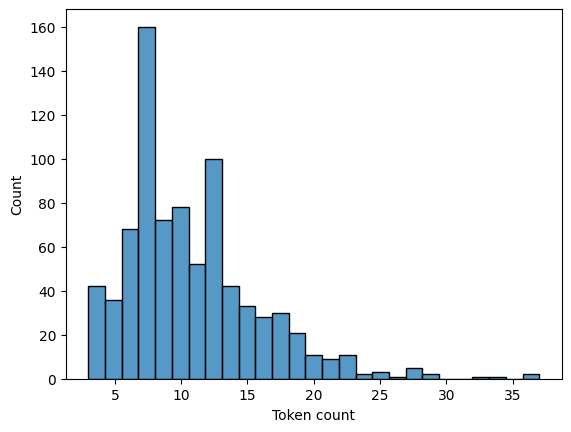

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

token_lens = []

for sentence in sentences:
  token_lens.append(len(sentence))

sns.histplot(token_lens)
plt.xlabel('Token count');

In [17]:
import statistics

# Printing result
print("Median of list is : " + str(statistics.median(token_lens)))
print("Mean of list is : " + str(statistics.mean(token_lens)))
print("Modus of list is : " + str(statistics.mode(token_lens)))

Median of list is : 10.0
Mean of list is : 10.84320987654321
Modus of list is : 8


## Load Fasttext

In [18]:
if(WORD_EMBEDDING == "FASTTEXT"):
    !pip install Cmake
    !pip install fasttext
    !pip install fasttext-wheel

In [19]:
if(WORD_EMBEDDING == 'FASTTEXT'):
  import fasttext
  ft = fasttext.load_model(FASTTEXT_MODEL_PATH)

# Data Loader

## Create Data Loader

### Data Loader Unified Model

In [20]:
if (WORD_EMBEDDING == 'INDOBERT'):
  class form_input_um():
      def __init__(self, df, labelEncoder):
          self.df = df
          self.max_length = config['MAX_LEN']
          self.tokenizer = config['tokenizer']
          self.labelEncoder = labelEncoder

      def __len__(self):
          return self.df.shape[0]

      def __getitem__(self, item):
          toks = []
          sentiment_tag = []

          word_arr = self.df.sentences[item].tolist()
          sentiment_tag_arr = self.df.class2_nums[item].tolist()

          for index, word in enumerate(word_arr):
              wordTokenizedArr = config['tokenizer'].tokenize(word)
              for wordTokenize in wordTokenizedArr:
                  toks.append(wordTokenize)
                  sentiment_tag.append(sentiment_tag_arr[index])

          if len(toks)>self.max_length:
              toks = toks[:self.max_length]
              sentiment_tag = sentiment_tag[:self.max_length]

          ########################################
          # Forming the inputs
          ids = self.tokenizer.convert_tokens_to_ids(toks)
          tok_type_id = [0] * len(ids)
          att_mask = [1] * len(ids)
          id_sentences = [self.df.id_sentence[item]] * len(ids)

          # Padding
          pad_len = self.max_length - len(ids)
          target_pad_len = self.max_length - len(sentiment_tag)

          ids = ids + [self.labelEncoder.transform(['PAD'])[0]] * pad_len
          tok_type_id = tok_type_id + [0] * pad_len
          att_mask = att_mask + [0] * pad_len
          id_sentences = id_sentences + [-1] * pad_len

          ########################################
          # Forming the label
          sentiment_tag = sentiment_tag + [self.labelEncoder.transform(['PAD'])[0]] * target_pad_len

          return {
              'ids': torch.tensor(ids, dtype = torch.long),
              'tok_type_id': torch.tensor(tok_type_id, dtype = torch.long),
              'att_mask': torch.tensor(att_mask, dtype = torch.long),
              'target': torch.tensor(sentiment_tag, dtype = torch.long),
              'id_sentence': torch.tensor(id_sentences),
            }
else:
  class form_input_um():
    def __init__(self, df, labelEncoder, fastText):
        self.df = df
        self.max_length = config['MAX_LEN']
        self.labelEncoder = labelEncoder
        self.fastText = fastText

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, item):
        toks = []
        sentiment_tag = []

        word_arr = self.df.sentences[item].tolist()
        sentiment_tag_arr = self.df.class2_nums[item].tolist()

        for index, word in enumerate(word_arr):
            toks.append(word)
            sentiment_tag.append(sentiment_tag_arr[index])

        if len(toks)>self.max_length:
            toks = toks[:self.max_length]
            sentiment_tag = sentiment_tag[:self.max_length]

        ########################################
        # Forming the inputs
        id_sentences = [self.df.id_sentence[item]] * len(toks)

        # Padding
        pad_len = self.max_length - len(toks)
        target_pad_len = self.max_length - len(sentiment_tag)

        toks = toks + ['[PAD]'] * pad_len
        id_sentences = id_sentences + [-1] * pad_len

        ########################################
        # Forming the label
        sentiment_tag = sentiment_tag + [self.labelEncoder.transform(['PAD'])[0]] * target_pad_len

        ########################################
        # Fasttext Vectorize
        fastText_embedding = []
        for word in toks:
          vector = self.fastText.get_word_vector(word)
          fastText_embedding.append(vector)

        return {
            'fasttext_embedding': torch.tensor(np.array(fastText_embedding)),
            'sentences': ' '.join(toks),
            'target': torch.tensor(sentiment_tag, dtype = torch.long),
            'id_sentence': torch.tensor(id_sentences),
           }

### Data Loader Join Aspect Polarity

In [21]:
if (WORD_EMBEDDING == 'INDOBERT'):
  class form_input_jap():
      def __init__(self, df, labelEncoder, labelEncoder2):
          self.df = df
          self.max_length = config['MAX_LEN']
          self.tokenizer = config['tokenizer']
          self.labelEncoder = labelEncoder
          self.labelEncoder2 = labelEncoder2

      def __len__(self):
          return self.df.shape[0]

      def __getitem__(self, item):
          toks = []
          label_tag = []
          sentiment_tag = []

          word_arr = self.df.sentences[item].tolist()
          label_tag_arr = self.df.tag_nums[item].tolist()
          sentiment_tag_arr = self.df.class1_nums[item].tolist()

          for index, word in enumerate(word_arr):
              wordTokenizedArr = config['tokenizer'].tokenize(word)
              for wordTokenize in wordTokenizedArr:
                  toks.append(wordTokenize)
                  label_tag.append(label_tag_arr[index])
                  sentiment_tag.append(sentiment_tag_arr[index])

          if len(toks)>self.max_length:
              toks = toks[:self.max_length]
              label_tag = label_tag[:self.max_length]
              sentiment_tag = sentiment_tag[:self.max_length]

          ########################################
          # Forming the inputs
          ids = self.tokenizer.convert_tokens_to_ids(toks)
          tok_type_id = [0] * len(ids)
          att_mask = [1] * len(ids)
          id_sentences = [self.df.id_sentence[item]] * len(ids)

          # Padding
          pad_len = self.max_length - len(ids)
          target_pad_len = self.max_length - len(label_tag)

          ids = ids + [self.labelEncoder.transform(['PAD'])[0]] * pad_len
          tok_type_id = tok_type_id + [0] * pad_len
          att_mask = att_mask + [0] * pad_len
          id_sentences = id_sentences + [-1] * pad_len

          ########################################
          # Forming the label
          label_tag = label_tag + [self.labelEncoder.transform(['PAD'])[0]] * target_pad_len
          sentiment_tag = sentiment_tag + [self.labelEncoder2.transform(['PAD'])[0]] * target_pad_len

          return {
              'ids': torch.tensor(ids, dtype = torch.long),
              'tok_type_id': torch.tensor(tok_type_id, dtype = torch.long),
              'att_mask': torch.tensor(att_mask, dtype = torch.long),
              'target_tag': torch.tensor(label_tag, dtype = torch.long),
              'target_sentiment': torch.tensor(sentiment_tag, dtype = torch.long),
              'id_sentence': torch.tensor(id_sentences),
            }
else:
  class form_input_jap():
    def __init__(self, df, labelEncoder, labelEncoder2, fastText):
        self.df = df
        self.max_length = config['MAX_LEN']
        self.labelEncoder = labelEncoder
        self.labelEncoder2 = labelEncoder2
        self.fastText = fastText

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, item):
        toks = []
        label_tag = []
        sentiment_tag = []

        word_arr = self.df.sentences[item].tolist()
        label_tag_arr = self.df.tag_nums[item].tolist()
        sentiment_tag_arr = self.df.class1_nums[item].tolist()

        for index, word in enumerate(word_arr):
            toks.append(word)
            label_tag.append(label_tag_arr[index])
            sentiment_tag.append(sentiment_tag_arr[index])

        if len(toks)>self.max_length:
            toks = toks[:self.max_length]
            label_tag = label_tag[:self.max_length]
            sentiment_tag = sentiment_tag[:self.max_length]

        ########################################
        # Forming the inputs
        id_sentences = [self.df.id_sentence[item]] * len(toks)

        # Padding
        pad_len = self.max_length - len(toks)
        target_pad_len = self.max_length - len(sentiment_tag)

        toks = toks + ['[PAD]'] * pad_len
        id_sentences = id_sentences + [-1] * pad_len

        ########################################
        # Forming the label
        label_tag = label_tag + [self.labelEncoder.transform(['PAD'])[0]] * target_pad_len
        sentiment_tag = sentiment_tag + [self.labelEncoder.transform(['PAD'])[0]] * target_pad_len

        ########################################
        # Fasttext Vectorize
        fastText_embedding = []
        for word in toks:
          vector = self.fastText.get_word_vector(word)
          fastText_embedding.append(vector)

        return {
            'fasttext_embedding': torch.tensor(np.array(fastText_embedding)),
            'sentences': ' '.join(toks),
            'target_tag': torch.tensor(label_tag, dtype = torch.long),
            'target_sentiment': torch.tensor(sentiment_tag, dtype = torch.long),
            'id_sentence': torch.tensor(id_sentences),
           }

## Load Data

In [22]:
from torch.utils.data import DataLoader

if(LEARNING_TECHNIQUE == "UM"):
  if(WORD_EMBEDDING == 'INDOBERT'):
    train_prod_input = form_input_um(new_df_train, le)
    # train_prod_input = form_input_um(new_df_valid, le)
    valid_prod_input = form_input_um(new_df_valid, le)
    test_prod_input = form_input_um(new_df_test, le)
  else:
    train_prod_input = form_input_um(new_df_train, le, ft)
    # train_prod_input = form_input_um(new_df_valid, le)
    valid_prod_input = form_input_um(new_df_valid, le, ft)
    test_prod_input = form_input_um(new_df_test, le, ft)
else:
  if(WORD_EMBEDDING == 'INDOBERT'):
    train_prod_input = form_input_jap(new_df_train, le_tag, le_sentiment)
    # train_prod_input = form_input_jap(new_df_valid, le_tag, le_sentiment)
    valid_prod_input = form_input_jap(new_df_valid, le_tag, le_sentiment)
    test_prod_input = form_input_jap(new_df_test, le_tag, le_sentiment)
  else:
    train_prod_input = form_input_jap(new_df_train, le_tag, le_sentiment, ft)
    # train_prod_input = form_input_jap(new_df_valid, le_tag, le_sentiment, ft)
    valid_prod_input = form_input_jap(new_df_valid, le_tag, le_sentiment, ft)
    test_prod_input = form_input_jap(new_df_test, le_tag, le_sentiment, ft)

train_prod_input_data_loader = DataLoader(train_prod_input,
                                          batch_size= config['batch_size'],
                                          shuffle=False)

valid_prod_input_data_loader = DataLoader(valid_prod_input,
                                          batch_size= config['batch_size'],
                                          shuffle=False)

test_prod_input_data_loader = DataLoader(test_prod_input,
                                          batch_size= config['batch_size'],
                                          shuffle=False)

# Training Function

## Unified Model Function

In [23]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

if (WORD_EMBEDDING == 'INDOBERT'):
  def train_fn_um(data_loader, model, optimizer):
      '''
      Functiont to train the model
      '''
      model.train()
      
      predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      train_loss = 0
      for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
          batch_input_ids = dataset['ids'].to(config['device'], dtype = torch.long)
          batch_att_mask = dataset['att_mask'].to(config['device'], dtype = torch.long)
          batch_tok_type_id = dataset['tok_type_id'].to(config['device'], dtype = torch.long)
          batch_target = dataset['target'].to(config['device'], dtype = torch.long)

          output = model(batch_input_ids,
                        token_type_ids=batch_tok_type_id,
                        attention_mask=batch_att_mask,
                        labels=batch_target)

          step_loss = output[0]
          prediction = output[1]

          step_loss.sum().backward()
          optimizer.step()
          train_loss += step_loss
          optimizer.zero_grad()

          train_prediction = np.argmax(prediction.detach().to('cpu').numpy(), axis = 2)
          actual = batch_target.to('cpu').numpy()

          predictions = np.concatenate((predictions, train_prediction), axis = 0)
          true_labels = np.concatenate((true_labels, actual), axis = 0)

      predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
      true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
      akurasi = accuracy_score(true_labels_1d, predictions_1d)

      return train_loss.sum(), akurasi
else:
  def train_fn_um(data_loader, model, optimizer):
    '''
    Functiont to train the model
    '''
    model.train()

    predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

    train_loss = 0
    for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
        batch_input_ids = dataset['fasttext_embedding'].to(config['device'])
        batch_target = dataset['target'].to(config['device'], dtype = torch.long)

        output = model(batch_input_ids,
                       labels=batch_target)

        step_loss = output[0]
        prediction = output[1]

        step_loss.sum().backward()
        optimizer.step()
        train_loss += step_loss
        optimizer.zero_grad()

        train_prediction = np.argmax(prediction.detach().to('cpu').numpy(), axis = 2)
        actual = batch_target.to('cpu').numpy()

        predictions = np.concatenate((predictions, train_prediction), axis = 0)
        true_labels = np.concatenate((true_labels, actual), axis = 0)

    predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
    true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
    akurasi = accuracy_score(true_labels_1d, predictions_1d)

    return train_loss.sum(), akurasi

## Joint Aspect Polarity Function

In [24]:
if (WORD_EMBEDDING == 'INDOBERT'):
  def train_tag_fn_jap(data_loader, model, optimizer):
      '''
      Functiont to train the model
      '''
      model.train()
      predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      train_loss = 0
      for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
          batch_input_ids = dataset['ids'].to(config['device'], dtype = torch.long)
          batch_att_mask = dataset['att_mask'].to(config['device'], dtype = torch.long)
          batch_tok_type_id = dataset['tok_type_id'].to(config['device'], dtype = torch.long)
          batch_target = dataset['target_tag'].to(config['device'], dtype = torch.long)

          output = model(batch_input_ids,
                        token_type_ids=None,
                        attention_mask=batch_att_mask,
                        labels=batch_target)

          step_loss = output[0]
          prediction = output[1]

          step_loss.sum().backward()
          optimizer.step()
          train_loss += step_loss
          optimizer.zero_grad()

          train_prediction = np.argmax(prediction.detach().to('cpu').numpy(), axis = 2)
          actual = batch_target.to('cpu').numpy()

          predictions = np.concatenate((predictions, train_prediction), axis = 0)
          true_labels = np.concatenate((true_labels, actual), axis = 0)

      predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
      true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
      akurasi = accuracy_score(true_labels_1d, predictions_1d)

      return train_loss.sum(), akurasi
else:
  def train_tag_fn_jap(data_loader, model, optimizer):
    '''
    Functiont to train the model
    '''
    model.train()

    predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

    train_loss = 0
    for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
        batch_input_ids = dataset['fasttext_embedding'].to(config['device'])
        batch_target = dataset['target_tag'].to(config['device'], dtype = torch.long)

        output = model(batch_input_ids,
                       labels=batch_target)

        step_loss = output[0]
        prediction = output[1]

        step_loss.sum().backward()
        optimizer.step()
        train_loss += step_loss
        optimizer.zero_grad()

        train_prediction = np.argmax(prediction.detach().to('cpu').numpy(), axis = 2)
        actual = batch_target.to('cpu').numpy()

        predictions = np.concatenate((predictions, train_prediction), axis = 0)
        true_labels = np.concatenate((true_labels, actual), axis = 0)

    predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
    true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
    akurasi = accuracy_score(true_labels_1d, predictions_1d)

    return train_loss.sum(), akurasi

In [25]:
if(WORD_EMBEDDING == 'INDOBERT'):
  def train_sentiment_fn_jap(data_loader, model, optimizer):
      '''
      Functiont to train the model
      '''
      model.train()

      predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      train_loss = 0
      for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
          batch_input_ids = dataset['ids'].to(config['device'], dtype = torch.long)
          batch_att_mask = dataset['att_mask'].to(config['device'], dtype = torch.long)
          batch_tok_type_id = dataset['tok_type_id'].to(config['device'], dtype = torch.long)
          batch_target = dataset['target_sentiment'].to(config['device'], dtype = torch.long)

          output = model(batch_input_ids,
                        token_type_ids=None,
                        attention_mask=batch_att_mask,
                        labels=batch_target)

          step_loss = output[0]
          prediction = output[1]

          step_loss.sum().backward()
          optimizer.step()
          train_loss += step_loss
          optimizer.zero_grad()

          train_prediction = np.argmax(prediction.detach().to('cpu').numpy(), axis = 2)
          actual = batch_target.to('cpu').numpy()

          predictions = np.concatenate((predictions, train_prediction), axis = 0)
          true_labels = np.concatenate((true_labels, actual), axis = 0)

      predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
      true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
      akurasi = accuracy_score(true_labels_1d, predictions_1d)

      return train_loss.sum(), akurasi
else :
  def train_sentiment_fn_jap(data_loader, model, optimizer):
    '''
    Functiont to train the model
    '''
    model.train()

    predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

    train_loss = 0
    for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
        batch_input_ids = dataset['fasttext_embedding'].to(config['device'])
        batch_target = dataset['target_sentiment'].to(config['device'], dtype = torch.long)

        output = model(batch_input_ids,
                       labels=batch_target)

        step_loss = output[0]
        prediction = output[1]

        step_loss.sum().backward()
        optimizer.step()
        train_loss += step_loss
        optimizer.zero_grad()

        train_prediction = np.argmax(prediction.detach().to('cpu').numpy(), axis = 2)
        actual = batch_target.to('cpu').numpy()

        predictions = np.concatenate((predictions, train_prediction), axis = 0)
        true_labels = np.concatenate((true_labels, actual), axis = 0)

    predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
    true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
    akurasi = accuracy_score(true_labels_1d, predictions_1d)

    return train_loss.sum(), akurasi

# Eval Function

## Unified Model Function

In [26]:
if(WORD_EMBEDDING == 'INDOBERT'):
  def eval_fn_um(data_loader, model):
      '''
      Functiont to evaluate the model on each epoch.
      We can also use Jaccard metric to see the performance on each epoch.
      '''

      model.eval()

      eval_loss = 0
      predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      id_sentence = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      ids_token = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      with torch.no_grad():
          for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
              batch_input_ids = dataset['ids'].to(config['device'], dtype = torch.long)
              batch_att_mask = dataset['att_mask'].to(config['device'], dtype = torch.long)
              batch_tok_type_id = dataset['tok_type_id'].to(config['device'], dtype = torch.long)
              batch_target = dataset['target'].to(config['device'], dtype = torch.long)

              output = model(batch_input_ids,
                            token_type_ids=batch_tok_type_id,
                            attention_mask=batch_att_mask,
                            labels=batch_target)

              step_loss = output[0]
              eval_prediction = output[1]

              eval_loss += step_loss

              eval_prediction = np.argmax(eval_prediction.detach().to('cpu').numpy(), axis = 2)
              actual = batch_target.to('cpu').numpy()

              predictions = np.concatenate((predictions, eval_prediction), axis = 0)
              true_labels = np.concatenate((true_labels, actual), axis = 0)
              id_sentence = np.concatenate((id_sentence, dataset['id_sentence']), axis=0)
              ids_token = np.concatenate((ids_token, dataset['ids']), axis=0)

      predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
      true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
      akurasi = accuracy_score(true_labels_1d, predictions_1d)

      return eval_loss.sum(), predictions, true_labels, id_sentence, ids_token, akurasi
else:
  def eval_fn_um(data_loader, model):
    '''
    Functiont to evaluate the model on each epoch.
    We can also use Jaccard metric to see the performance on each epoch.
    '''

    model.eval()

    eval_loss = 0
    predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

    id_sentence = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    ids_token = np.array([])

    with torch.no_grad():
        for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
            batch_input_ids = dataset['fasttext_embedding'].to(config['device'])
            batch_target = dataset['target'].to(config['device'], dtype = torch.long)

            output = model(batch_input_ids,
                           labels=batch_target)

            step_loss = output[0]
            eval_prediction = output[1]

            eval_loss += step_loss

            eval_prediction = np.argmax(eval_prediction.detach().to('cpu').numpy(), axis = 2)
            actual = batch_target.to('cpu').numpy()

            predictions = np.concatenate((predictions, eval_prediction), axis = 0)
            true_labels = np.concatenate((true_labels, actual), axis = 0)
            id_sentence = np.concatenate((id_sentence, dataset['id_sentence']), axis=0)
            ids_token = np.concatenate((ids_token, dataset['sentences']), axis=0)

    predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
    true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
    akurasi = accuracy_score(true_labels_1d, predictions_1d)

    return eval_loss.sum(), predictions, true_labels, id_sentence, ids_token, akurasi

## Joint Aspect Polarity Function

In [27]:
if(WORD_EMBEDDING == 'INDOBERT'):
  def eval_tag_fn_jap(data_loader, model):
      '''
      Functiont to evaluate the model on each epoch.
      We can also use Jaccard metric to see the performance on each epoch.
      '''

      model.eval()

      eval_loss = 0
      predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      id_sentence = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      ids_token = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      with torch.no_grad():
          for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
              batch_input_ids = dataset['ids'].to(config['device'], dtype = torch.long)
              batch_att_mask = dataset['att_mask'].to(config['device'], dtype = torch.long)
              batch_tok_type_id = dataset['tok_type_id'].to(config['device'], dtype = torch.long)
              batch_target = dataset['target_tag'].to(config['device'], dtype = torch.long)

              output = model(batch_input_ids,
                            token_type_ids=None,
                            attention_mask=batch_att_mask,
                            labels=batch_target)

              step_loss = output[0]
              eval_prediction = output[1]

              eval_loss += step_loss

              eval_prediction = np.argmax(eval_prediction.detach().to('cpu').numpy(), axis = 2)
              actual = batch_target.to('cpu').numpy()

              predictions = np.concatenate((predictions, eval_prediction), axis = 0)
              true_labels = np.concatenate((true_labels, actual), axis = 0)
              id_sentence = np.concatenate((id_sentence, dataset['id_sentence']), axis=0)
              ids_token = np.concatenate((ids_token, dataset['ids']), axis=0)

      predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
      true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
      akurasi = accuracy_score(true_labels_1d, predictions_1d)

      return eval_loss.sum(), predictions, true_labels, id_sentence, ids_token, akurasi
else :
  def eval_tag_fn_jap(data_loader, model):
    '''
    Functiont to evaluate the model on each epoch.
    We can also use Jaccard metric to see the performance on each epoch.
    '''

    model.eval()

    eval_loss = 0
    predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

    id_sentence = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    ids_token = np.array([])

    with torch.no_grad():
        for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
            batch_input_ids = dataset['fasttext_embedding'].to(config['device'])
            batch_target = dataset['target_tag'].to(config['device'], dtype = torch.long)

            output = model(batch_input_ids,
                           labels=batch_target)

            step_loss = output[0]
            eval_prediction = output[1]

            eval_loss += step_loss

            eval_prediction = np.argmax(eval_prediction.detach().to('cpu').numpy(), axis = 2)
            actual = batch_target.to('cpu').numpy()

            predictions = np.concatenate((predictions, eval_prediction), axis = 0)
            true_labels = np.concatenate((true_labels, actual), axis = 0)
            id_sentence = np.concatenate((id_sentence, dataset['id_sentence']), axis=0)
            ids_token = np.concatenate((ids_token, dataset['sentences']), axis=0)

    predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
    true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
    akurasi = accuracy_score(true_labels_1d, predictions_1d)

    return eval_loss.sum(), predictions, true_labels, id_sentence, ids_token, akurasi


In [28]:
if(WORD_EMBEDDING == 'INDOBERT'):
  def eval_sentiment_fn_jap(data_loader, model):
      '''
      Functiont to evaluate the model on each epoch.
      We can also use Jaccard metric to see the performance on each epoch.
      '''

      model.eval()

      eval_loss = 0
      predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      id_sentence = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
      ids_token = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

      with torch.no_grad():
          for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
              batch_input_ids = dataset['ids'].to(config['device'], dtype = torch.long)
              batch_att_mask = dataset['att_mask'].to(config['device'], dtype = torch.long)
              batch_tok_type_id = dataset['tok_type_id'].to(config['device'], dtype = torch.long)
              batch_target = dataset['target_sentiment'].to(config['device'], dtype = torch.long)

              output = model(batch_input_ids,
                            token_type_ids=None,
                            attention_mask=batch_att_mask,
                            labels=batch_target)

              step_loss = output[0]
              eval_prediction = output[1]

              eval_loss += step_loss

              eval_prediction = np.argmax(eval_prediction.detach().to('cpu').numpy(), axis = 2)
              actual = batch_target.to('cpu').numpy()

              predictions = np.concatenate((predictions, eval_prediction), axis = 0)
              true_labels = np.concatenate((true_labels, actual), axis = 0)
              id_sentence = np.concatenate((id_sentence, dataset['id_sentence']), axis=0)
              ids_token = np.concatenate((ids_token, dataset['ids']), axis=0)

      predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
      true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
      akurasi = accuracy_score(true_labels_1d, predictions_1d)

      return eval_loss.sum(), predictions, true_labels, id_sentence, ids_token, akurasi
else:
  def eval_sentiment_fn_jap(data_loader, model):
    '''
    Functiont to evaluate the model on each epoch.
    We can also use Jaccard metric to see the performance on each epoch.
    '''

    model.eval()

    eval_loss = 0
    predictions = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    true_labels = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])

    id_sentence = np.array([], dtype = np.int64).reshape(0, config['MAX_LEN'])
    ids_token = np.array([])

    with torch.no_grad():
        for index, dataset in enumerate(tqdm(data_loader, total = len(data_loader))):
            batch_input_ids = dataset['fasttext_embedding'].to(config['device'])
            batch_target = dataset['target_sentiment'].to(config['device'], dtype = torch.long)

            output = model(batch_input_ids,
                           labels=batch_target)

            step_loss = output[0]
            eval_prediction = output[1]

            eval_loss += step_loss

            eval_prediction = np.argmax(eval_prediction.detach().to('cpu').numpy(), axis = 2)
            actual = batch_target.to('cpu').numpy()

            predictions = np.concatenate((predictions, eval_prediction), axis = 0)
            true_labels = np.concatenate((true_labels, actual), axis = 0)
            id_sentence = np.concatenate((id_sentence, dataset['id_sentence']), axis=0)
            ids_token = np.concatenate((ids_token, dataset['sentences']), axis=0)

    predictions_1d = np.reshape(predictions, (predictions.shape[0] * predictions.shape[1]))
    true_labels_1d = np.reshape(true_labels, (true_labels.shape[0] * true_labels.shape[1]))
    akurasi = accuracy_score(true_labels_1d, predictions_1d)

    return eval_loss.sum(), predictions, true_labels, id_sentence, ids_token, akurasi

# Train Engine

## Classification Model

### Fasttext Linear Model

In [29]:
import torch.nn as nn
import torch.nn.functional as F

if(CLASSIFIER == 'LINEAR'):
  class TagClassifier(nn.Module):
    def __init__(self, n_classes):
      super(TagClassifier, self).__init__()
      self.dropout = nn.Dropout(config['GLOBAL_DROPOUT'])
      self.linear1 = nn.Linear(300, 300)
      self.linear2 = nn.Linear(300, 300)
      self.linear3 = nn.Linear(300, n_classes)
      self.n_classes = n_classes

    def forward(self, fasttext_embedding, labels):
      tag_space = self.dropout(fasttext_embedding)
      tag_space = self.linear1(tag_space)
      tag_space = self.dropout(tag_space)
      tag_space = self.linear2(tag_space)
      tag_space = self.dropout(tag_space)
      tag_space = self.linear3(tag_space)
      
      tag_scores = F.log_softmax(tag_space, dim=1)

      loss = None
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

      return loss, tag_scores

### BERT LSTM Model

In [30]:
if(WORD_EMBEDDING == "INDOBERT" and CLASSIFIER == 'LSTM'):
  class TagClassifier(nn.Module):
    def __init__(self, n_classes):
      super(TagClassifier, self).__init__()
      self.bert_model = transformers.AutoModel.from_pretrained(config['bert_name'], return_dict=False)
  #     for param in self.bert_model.parameters():
  #         param.requires_grad = False

      self.lstm = nn.LSTM(config['LSTM_embedding_dim'], config['LSTM_hidden_dim'], dropout=config['GLOBAL_DROPOUT'])
      self.hidden2tag1 = nn.Linear(config['LSTM_hidden_dim'], config['LSTM_hidden_dim'])
      self.hidden2tag2 = nn.Linear(config['LSTM_hidden_dim'], config['LSTM_hidden_dim'])
      self.hidden2tag3 = nn.Linear(config['LSTM_hidden_dim'], n_classes)
      self.dropout = nn.Dropout(config['GLOBAL_DROPOUT'])
      self.n_classes = n_classes

    def forward(self, input_ids, token_type_ids, attention_mask, labels):
      last_hidden_state, pooled_output = self.bert_model(
        input_ids=input_ids,
        token_type_ids=token_type_ids,
        attention_mask=attention_mask,
        return_dict=False
      )

      lstm_out, _ = self.lstm(last_hidden_state)
      lstm_out = self.dropout(lstm_out)
      tag_space = self.hidden2tag1(lstm_out)
      tag_space = self.dropout(tag_space)
      tag_space = self.hidden2tag2(tag_space)
      tag_space = self.dropout(tag_space)
      tag_space = self.hidden2tag3(tag_space)

      tag_scores = F.log_softmax(tag_space, dim=1)

      loss = None
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

      return loss, tag_scores

### Fasttext LSTM Model

In [31]:
if(WORD_EMBEDDING == "FASTTEXT" and CLASSIFIER == 'LSTM'):
  class TagClassifier(nn.Module):
    def __init__(self, n_classes):
      super(TagClassifier, self).__init__()
      self.lstm = nn.LSTM(config['LSTM_embedding_dim'], config['LSTM_hidden_dim'], dropout=config['GLOBAL_DROPOUT'])
      self.hidden2tag1 = nn.Linear(config['LSTM_hidden_dim'], config['LSTM_hidden_dim'])
      self.hidden2tag2 = nn.Linear(config['LSTM_hidden_dim'], config['LSTM_hidden_dim'])
      self.hidden2tag3 = nn.Linear(config['LSTM_hidden_dim'], n_classes)
      self.dropout = nn.Dropout(config['GLOBAL_DROPOUT'])
      self.n_classes = n_classes

    def forward(self, fasttext_embedding, labels):
      lstm_out, _ = self.lstm(fasttext_embedding)
      lstm_out = self.dropout(lstm_out)
      tag_space = self.hidden2tag1(lstm_out)
      tag_space = self.dropout(tag_space)
      tag_space = self.hidden2tag2(tag_space)
      tag_space = self.dropout(tag_space)
      tag_space = self.hidden2tag3(tag_space)

      tag_scores = F.log_softmax(tag_space, dim=1)

      loss = None
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

      return loss, tag_scores

### BERT CNN Model

In [32]:
# if(WORD_EMBEDDING == "INDOBERT" and CLASSIFIER == 'CNN'):
#   class TagClassifier(nn.Module):
#     def __init__(self, n_classes):
#       super(TagClassifier, self).__init__()
#       self.bert_model = transformers.AutoModel.from_pretrained(config['bert_name'], return_dict=False)
#   #     for param in self.bert_model.parameters():
#   #         param.requires_grad = False

#       self.ngram = nn.Conv1d(config['CNN_input'], config['CNN_output'] , config['CNN_ngram'])
#   #     self.trigram = nn.Conv1d(config['MAX_LEN'], config['MAX_LEN'], 3)
#       if(CNN_POOLING == "MAX_POOLING"):
#           self.pool = nn.AdaptiveMaxPool1d(config['MAX_LEN'])
#       else:
#           self.pool = nn.AdaptiveAvgPool1d(config['MAX_LEN'])
#       self.out_1 = nn.Linear(config['CNN_output'], config['CNN_output'])
#       self.out_2 = nn.Linear(config['CNN_output'], config['CNN_output'])
#       self.out_3 = nn.Linear(config['CNN_output'], n_classes)
#       self.n_classes = n_classes

#     def forward(self, input_ids, token_type_ids, attention_mask, labels):
#       last_hidden_state, pooled_output = self.bert_model(
#         input_ids=input_ids,
#         token_type_ids=token_type_ids,
#         attention_mask=attention_mask,
#         return_dict=False
#       )

#       x_1 = self.ngram(last_hidden_state.permute(0,2,1))
#   #     x_2 = self.trigram(last_hidden_state)

#       pool = self.pool(x_1)
#   #     maxpool_2 = self.maxPool(x_2)

#   #     merged = torch.concat([maxpool_1, maxpool_2], 2)
#       tag_space = self.out_1(pool.permute(0,2,1))
#       tag_space = self.out_2(tag_space)
#       tag_space = self.out_3(tag_space)

#       tag_scores = F.log_softmax(tag_space, dim=1)

#       loss = None
#       loss_fct = nn.CrossEntropyLoss()
#       loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

#       return loss, tag_scores

In [33]:
if(WORD_EMBEDDING == "INDOBERT" and CLASSIFIER == 'CNN'):
  class TagClassifier(nn.Module):
    def __init__(self, n_classes):
      super(TagClassifier, self).__init__()
      self.bert_model = transformers.AutoModel.from_pretrained(config['bert_name'], return_dict=False)
          
      self.unigram = nn.Conv1d(config['CNN_input'], config['CNN_output'] , 1)
      self.ngram = nn.Conv1d(config['CNN_input'], config['CNN_output'] , config['CNN_ngram'])
      self.lengram = nn.Conv1d(config['CNN_input'], config['CNN_output'], config['MAX_LEN'])
        
      if(CNN_POOLING == "MAX_POOLING"):
          self.pool = nn.AdaptiveMaxPool1d(config['MAX_LEN'])
      else:
          self.pool = nn.AdaptiveAvgPool1d(config['MAX_LEN'])

      self.out_1 = nn.Linear((config['CNN_output']*3), config['CNN_output'])
      self.out_2 = nn.Linear(config['CNN_output'], config['CNN_output'])
      self.out_3 = nn.Linear(config['CNN_output'], n_classes)

      self.n_classes = n_classes

    def forward(self, input_ids, token_type_ids, attention_mask, labels):
      last_hidden_state, pooled_output = self.bert_model(
        input_ids=input_ids,
        token_type_ids=token_type_ids,
        attention_mask=attention_mask,
        return_dict=False
      )

      x_1 = self.unigram(last_hidden_state.permute(0,2,1))
      x_2 = self.ngram(last_hidden_state.permute(0,2,1))
      x_3 = self.lengram(last_hidden_state.permute(0,2,1))

      pool1 = self.pool(x_1)
      pool2 = self.pool(x_2)
      pool3 = self.pool(x_3)

      x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in [pool1, pool2, pool3]], dim=1)

      tag_space = self.out_1(x_fc.permute(0,2,1))
      tag_space = self.out_2(tag_space)
      tag_space = self.out_3(tag_space)
    
      tag_scores = F.log_softmax(tag_space, dim=1)

      loss = None
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

      return loss, tag_scores

### Fasttext CNN Model

In [34]:
# if(WORD_EMBEDDING == "FASTTEXT" and CLASSIFIER == 'CNN'):
#   class TagClassifier(nn.Module):
#     def __init__(self, n_classes):
#       super(TagClassifier, self).__init__()
#       self.ngram = nn.Conv1d(config['MAX_LEN'], config['CNN_output'] , config['CNN_ngram'])
#       # self.bigram = nn.Conv1d(config['MAX_LEN'], config['MAX_LEN'] , 2)
#       # self.trigram = nn.Conv1d(config['MAX_LEN'], config['MAX_LEN'], 3)
#       # self.maxPool = nn.AdaptiveMaxPool1d(config['CNN_max_pool'])
#       # self.out_2 = nn.Linear(config['CNN_max_pool']*2, n_classes)
#       # self.out_2 = nn.Linear(597, n_classes)
#       if(CNN_POOLING == "MAX_POOLING"):
#           self.pool = nn.AdaptiveMaxPool1d(config['MAX_LEN'])
#       else:
#           self.pool = nn.AdaptiveAvgPool1d(config['MAX_LEN'])
#       self.out_1 = nn.Linear(config['CNN_output'], config['CNN_output'])
#       self.out_2 = nn.Linear(config['CNN_output'], config['CNN_output'])
#       self.out_3 = nn.Linear(config['CNN_output'], n_classes)

#       self.n_classes = n_classes

#     def forward(self, fasttext_embedding, labels):
#       # x_1 = self.bigram(fasttext_embedding)
#       # x_2 = self.trigram(fasttext_embedding)
#       x_1 = self.ngram(fasttext_embedding)
#       pool = self.pool(x_1)

#       tag_space = self.out_1(pool.permute(0,2,1))
#       tag_space = self.out_2(tag_space)
#       tag_space = self.out_3(tag_space)
#       # maxpool_1 = self.maxPool(x_1)
#       # maxpool_2 = self.maxPool(x_2)

#       # merged = torch.concat([maxpool_1, maxpool_2], 2)
#       # merged = torch.concat([x_1, x_2], 2)
#       # tag_space = self.out_2(merged)

#       tag_scores = F.log_softmax(tag_space, dim=1)

#       loss = None
#       loss_fct = nn.CrossEntropyLoss()
#       loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

#       return loss, tag_scores

In [35]:
if(WORD_EMBEDDING == "FASTTEXT" and CLASSIFIER == 'CNN'):
  class TagClassifier(nn.Module):
    def __init__(self, n_classes):
      super(TagClassifier, self).__init__()
      self.unigram = nn.Conv1d(config['CNN_input'], config['CNN_output'] , 1)
      self.ngram = nn.Conv1d(config['CNN_input'], config['CNN_output'] , config['CNN_ngram'])
      self.lengram = nn.Conv1d(config['CNN_input'], config['CNN_output'], config['MAX_LEN'])

      if(CNN_POOLING == "MAX_POOLING"):
          self.pool = nn.AdaptiveMaxPool1d(config['MAX_LEN'])
      else:
          self.pool = nn.AdaptiveAvgPool1d(config['MAX_LEN'])
      self.out_1 = nn.Linear((config['CNN_output']*3), config['CNN_output'])
      self.out_2 = nn.Linear(config['CNN_output'], config['CNN_output'])
      self.out_3 = nn.Linear(config['CNN_output'], n_classes)
      self.n_classes = n_classes

    def forward(self, fasttext_embedding, labels):
      # x_1 = self.bigram(fasttext_embedding)
      # x_2 = self.trigram(fasttext_embedding)
      x_1 = self.unigram(fasttext_embedding.permute(0,2,1))
      x_2 = self.ngram(fasttext_embedding.permute(0,2,1))
      x_3 = self.lengram(fasttext_embedding.permute(0,2,1))
        
      pool1 = self.pool(x_1)
      pool2 = self.pool(x_2)
      pool3 = self.pool(x_3)

      x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in [pool1, pool2, pool3]], dim=1)

      # print(x_fc.shape)
      # print(x_fc.permute(0,2,1).shape)
      # print((config['CNN_output']*3), config['CNN_output'])
        
      tag_space = self.out_1(x_fc.permute(0,2,1))
      tag_space = self.out_2(tag_space)
      tag_space = self.out_3(tag_space)

      tag_scores = F.log_softmax(tag_space, dim=1)

      loss = None
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(tag_scores.view(-1, self.n_classes), labels.view(-1))

      return loss, tag_scores

## Unified Model

### Function

In [36]:
!pip install transformers

In [37]:
import transformers
from transformers import AutoConfig

if(WORD_EMBEDDING == 'INDOBERT' and CLASSIFIER == "LINEAR"):
  def train_engine(epoch, train_data, valid_data, label_encoder):
      model_config = AutoConfig.from_pretrained(config['bert_name'])
      model_config.hidden_dropout_prob = config['hidden_dropout_prob']
      model_config.attention_probs_dropout_prob = config['attention_probs_dropout_prob']
      model_config.num_labels = len(label_encoder.classes_)
      model = transformers.AutoModelForTokenClassification.from_config(model_config)
      # model = transformers.AutoModelForTokenClassification.from_pretrained(config['bert_name'],  num_labels = len(label_encoder.classes_))

  #     model = nn.DataParallel(model)
      model = model.to(config['device'])

      params = model.parameters()
      optimizer = torch.optim.Adam(params, lr= 3e-5)
      # optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9)

      best_eval_loss = 1000000
      best_eval_acc = -9999
      history_eval_acc = []
      history_train_acc = []
      for i in range(epoch):
          train_loss, train_accuracy = train_fn_um(data_loader = train_data,
                                model=model,
                                optimizer=optimizer)
          eval_loss, eval_predictions, true_labels, id_sentences, ids_token, eval_accuracy = eval_fn_um(data_loader = valid_data,
                                                            model=model)

          print(f"Epoch {i} , Train loss: {train_loss}, Eval loss: {eval_loss}, train_accuracy: {train_accuracy}, eval_accuracy: {eval_accuracy}")


          history_eval_acc.append(eval_accuracy)
          history_train_acc.append(train_accuracy)

          if eval_accuracy > best_eval_acc:
              best_eval_acc = eval_accuracy
              print("Saving the model")
              torch.save(model.state_dict(), config['saved_model_name'])

          # if ((i % 3) == 0):
          #     print("Saving the model")
          #     torch.save(model.state_dict(), config['saved_model_name']+"-"+str(i))

      return model, eval_predictions, true_labels, history_eval_acc, history_train_acc
else:
  def train_engine(epoch, train_data, valid_data, label_encoder):
    model = TagClassifier(len(label_encoder.classes_))
    model = model.to(config['device'])

    params = model.parameters()
    optimizer = torch.optim.Adam(params, lr= 3e-5)

    best_eval_accuracy = 0
    history_eval_acc = []
    history_train_acc = []
    for i in range(epoch):
        train_loss, train_accuracy = train_fn_um(
                              data_loader = train_data,
                              model=model,
                              optimizer=optimizer)
        eval_loss, eval_predictions, true_labels, id_sentences, ids_token, eval_accuracy = eval_fn_um(data_loader = valid_data,
                                                           model=model)

        print(f"Epoch {i} , Train loss: {train_loss}, Eval loss: {eval_loss}, train_accuracy: {train_accuracy}, eval_accuracy: {eval_accuracy}")

        history_eval_acc.append(eval_accuracy)
        history_train_acc.append(train_accuracy)

        if eval_accuracy > best_eval_accuracy:
            best_eval_accuracy = eval_accuracy
            print("Saving the model")
            torch.save(model.state_dict(), config['saved_model_name'])

        # if ((i % 10) == 0):
        #     print("Saving the model")
        #     torch.save(model.state_dict(), config['saved_model_name_tag']+"-"+str(i))

    return model, eval_predictions, true_labels, history_eval_acc, history_train_acc

### Call Function

In [38]:
if (LEARNING_TECHNIQUE == "UM"):
  model, val_predictions, val_true_labels, history_eval_acc, history_train_acc = train_engine(epoch=config['Epoch'],
                                                        train_data=train_prod_input_data_loader,
                                                        valid_data=valid_prod_input_data_loader,
                                                        label_encoder=le)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
100%|██████████| 9/9 [00:00<00:00, 41.08it/s]


Epoch 0 , Train loss: 276.3447570800781, Eval loss: 22.764341354370117, train_accuracy: 0.5571604938271605, eval_accuracy: 0.6396296296296297
Saving the model


100%|██████████| 9/9 [00:00<00:00, 43.82it/s]


Epoch 1 , Train loss: 122.94735717773438, Eval loss: 9.947830200195312, train_accuracy: 0.6917283950617283, eval_accuracy: 0.7622222222222222
Saving the model


100%|██████████| 9/9 [00:00<00:00, 43.90it/s]


Epoch 2 , Train loss: 90.20196533203125, Eval loss: 9.147998809814453, train_accuracy: 0.7593415637860083, eval_accuracy: 0.7677777777777778
Saving the model


100%|██████████| 9/9 [00:00<00:00, 42.63it/s]


Epoch 3 , Train loss: 83.39366912841797, Eval loss: 9.1466064453125, train_accuracy: 0.7620164609053498, eval_accuracy: 0.7692592592592593
Saving the model


100%|██████████| 9/9 [00:00<00:00, 40.99it/s]


Epoch 4 , Train loss: 75.3425521850586, Eval loss: 8.617255210876465, train_accuracy: 0.7808230452674897, eval_accuracy: 0.7870370370370371
Saving the model


100%|██████████| 9/9 [00:00<00:00, 43.80it/s]


Epoch 5 , Train loss: 67.75141143798828, Eval loss: 8.137447357177734, train_accuracy: 0.7997119341563786, eval_accuracy: 0.7981481481481482
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.10it/s]


Epoch 6 , Train loss: 58.86810302734375, Eval loss: 7.928188323974609, train_accuracy: 0.8251440329218107, eval_accuracy: 0.8022222222222222
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.15it/s]


Epoch 7 , Train loss: 53.58407211303711, Eval loss: 7.720749378204346, train_accuracy: 0.83440329218107, eval_accuracy: 0.8085185185185185
Saving the model


100%|██████████| 9/9 [00:00<00:00, 44.00it/s]


Epoch 8 , Train loss: 49.853363037109375, Eval loss: 7.590167045593262, train_accuracy: 0.844320987654321, eval_accuracy: 0.8059259259259259


100%|██████████| 9/9 [00:00<00:00, 42.04it/s]


Epoch 9 , Train loss: 46.240882873535156, Eval loss: 7.490362644195557, train_accuracy: 0.8521399176954733, eval_accuracy: 0.8092592592592592
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.31it/s]


Epoch 10 , Train loss: 42.397151947021484, Eval loss: 7.423127174377441, train_accuracy: 0.8640740740740741, eval_accuracy: 0.8185185185185185
Saving the model


100%|██████████| 9/9 [00:00<00:00, 46.08it/s]


Epoch 11 , Train loss: 39.134010314941406, Eval loss: 7.398658752441406, train_accuracy: 0.8718930041152263, eval_accuracy: 0.8137037037037037


100%|██████████| 9/9 [00:00<00:00, 47.09it/s]


Epoch 12 , Train loss: 35.82050704956055, Eval loss: 6.98396110534668, train_accuracy: 0.8834156378600823, eval_accuracy: 0.8207407407407408
Saving the model


100%|██████████| 9/9 [00:00<00:00, 49.64it/s]


Epoch 13 , Train loss: 32.650230407714844, Eval loss: 7.168792247772217, train_accuracy: 0.8944855967078189, eval_accuracy: 0.8222222222222222
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.01it/s]


Epoch 14 , Train loss: 29.527029037475586, Eval loss: 7.095085620880127, train_accuracy: 0.9050617283950617, eval_accuracy: 0.8374074074074074
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.43it/s]


Epoch 15 , Train loss: 27.342599868774414, Eval loss: 7.026211261749268, train_accuracy: 0.9141975308641975, eval_accuracy: 0.832962962962963


100%|██████████| 9/9 [00:00<00:00, 41.39it/s]


Epoch 16 , Train loss: 24.12960433959961, Eval loss: 7.400250434875488, train_accuracy: 0.9221810699588477, eval_accuracy: 0.8366666666666667


100%|██████████| 9/9 [00:00<00:00, 53.25it/s]


Epoch 17 , Train loss: 22.43035316467285, Eval loss: 7.328690052032471, train_accuracy: 0.9288888888888889, eval_accuracy: 0.8425925925925926
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.49it/s]


Epoch 18 , Train loss: 21.129161834716797, Eval loss: 7.42612886428833, train_accuracy: 0.934320987654321, eval_accuracy: 0.8388888888888889


100%|██████████| 9/9 [00:00<00:00, 42.60it/s]


Epoch 19 , Train loss: 20.242507934570312, Eval loss: 7.516582489013672, train_accuracy: 0.9354320987654321, eval_accuracy: 0.8411111111111111


100%|██████████| 9/9 [00:00<00:00, 44.77it/s]


Epoch 20 , Train loss: 19.525585174560547, Eval loss: 7.329391956329346, train_accuracy: 0.9377777777777778, eval_accuracy: 0.8433333333333334
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.91it/s]


Epoch 21 , Train loss: 18.513479232788086, Eval loss: 7.4843292236328125, train_accuracy: 0.9409876543209876, eval_accuracy: 0.8455555555555555
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.41it/s]


Epoch 22 , Train loss: 17.973827362060547, Eval loss: 7.490156173706055, train_accuracy: 0.9430041152263374, eval_accuracy: 0.8474074074074074
Saving the model


100%|██████████| 9/9 [00:00<00:00, 42.01it/s]


Epoch 23 , Train loss: 16.814517974853516, Eval loss: 7.659664630889893, train_accuracy: 0.9463786008230453, eval_accuracy: 0.845925925925926


100%|██████████| 9/9 [00:00<00:00, 42.41it/s]


Epoch 24 , Train loss: 16.630748748779297, Eval loss: 8.1845121383667, train_accuracy: 0.9462962962962963, eval_accuracy: 0.8422222222222222


100%|██████████| 9/9 [00:00<00:00, 42.29it/s]


Epoch 25 , Train loss: 16.672119140625, Eval loss: 7.48757791519165, train_accuracy: 0.9478189300411523, eval_accuracy: 0.8496296296296296
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.50it/s]


Epoch 26 , Train loss: 17.161802291870117, Eval loss: 7.5464630126953125, train_accuracy: 0.9476954732510288, eval_accuracy: 0.8455555555555555


100%|██████████| 9/9 [00:00<00:00, 43.07it/s]


Epoch 27 , Train loss: 15.58448600769043, Eval loss: 7.443049430847168, train_accuracy: 0.9509465020576132, eval_accuracy: 0.8525925925925926
Saving the model


100%|██████████| 9/9 [00:00<00:00, 42.21it/s]


Epoch 28 , Train loss: 14.673986434936523, Eval loss: 7.437589645385742, train_accuracy: 0.9547325102880658, eval_accuracy: 0.8540740740740741
Saving the model


100%|██████████| 9/9 [00:00<00:00, 42.97it/s]


Epoch 29 , Train loss: 14.073838233947754, Eval loss: 7.911261081695557, train_accuracy: 0.9567489711934156, eval_accuracy: 0.8551851851851852
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.97it/s]


Epoch 30 , Train loss: 13.87324333190918, Eval loss: 7.913727283477783, train_accuracy: 0.9567078189300412, eval_accuracy: 0.8496296296296296


100%|██████████| 9/9 [00:00<00:00, 41.61it/s]


Epoch 31 , Train loss: 13.574460983276367, Eval loss: 8.168231010437012, train_accuracy: 0.9572427983539095, eval_accuracy: 0.8585185185185186
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.48it/s]


Epoch 32 , Train loss: 13.703584671020508, Eval loss: 7.9030632972717285, train_accuracy: 0.9583127572016461, eval_accuracy: 0.8581481481481481


100%|██████████| 9/9 [00:00<00:00, 42.17it/s]


Epoch 33 , Train loss: 13.389120101928711, Eval loss: 8.00418758392334, train_accuracy: 0.9586831275720165, eval_accuracy: 0.8555555555555555


100%|██████████| 9/9 [00:00<00:00, 41.50it/s]


Epoch 34 , Train loss: 13.432755470275879, Eval loss: 8.168913841247559, train_accuracy: 0.9583539094650205, eval_accuracy: 0.8622222222222222
Saving the model


100%|██████████| 9/9 [00:00<00:00, 41.56it/s]


Epoch 35 , Train loss: 13.67059326171875, Eval loss: 8.947574615478516, train_accuracy: 0.9578189300411523, eval_accuracy: 0.8577777777777778


100%|██████████| 9/9 [00:00<00:00, 42.32it/s]


Epoch 36 , Train loss: 14.23613452911377, Eval loss: 8.478079795837402, train_accuracy: 0.955679012345679, eval_accuracy: 0.8581481481481481


100%|██████████| 9/9 [00:00<00:00, 41.97it/s]


Epoch 37 , Train loss: 13.149331092834473, Eval loss: 8.563161849975586, train_accuracy: 0.9597119341563786, eval_accuracy: 0.855925925925926


100%|██████████| 9/9 [00:00<00:00, 42.04it/s]


Epoch 38 , Train loss: 13.104198455810547, Eval loss: 8.849610328674316, train_accuracy: 0.9588888888888889, eval_accuracy: 0.8577777777777778


100%|██████████| 9/9 [00:00<00:00, 42.38it/s]


Epoch 39 , Train loss: 13.733455657958984, Eval loss: 8.304924011230469, train_accuracy: 0.9581481481481482, eval_accuracy: 0.8562962962962963


100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


Epoch 40 , Train loss: 13.178746223449707, Eval loss: 8.332294464111328, train_accuracy: 0.9592592592592593, eval_accuracy: 0.8488888888888889


100%|██████████| 9/9 [00:00<00:00, 42.30it/s]


Epoch 41 , Train loss: 13.110798835754395, Eval loss: 8.729784965515137, train_accuracy: 0.9592181069958847, eval_accuracy: 0.8614814814814815


100%|██████████| 9/9 [00:00<00:00, 42.79it/s]


Epoch 42 , Train loss: 12.80703067779541, Eval loss: 7.547469139099121, train_accuracy: 0.9604526748971194, eval_accuracy: 0.8625925925925926
Saving the model


100%|██████████| 9/9 [00:00<00:00, 40.91it/s]


Epoch 43 , Train loss: 12.48172664642334, Eval loss: 8.59341049194336, train_accuracy: 0.9606995884773663, eval_accuracy: 0.855925925925926


100%|██████████| 9/9 [00:00<00:00, 42.23it/s]


Epoch 44 , Train loss: 12.51630973815918, Eval loss: 8.337260246276855, train_accuracy: 0.9611522633744856, eval_accuracy: 0.8566666666666667


100%|██████████| 9/9 [00:00<00:00, 42.61it/s]


Epoch 45 , Train loss: 12.37275505065918, Eval loss: 8.996065139770508, train_accuracy: 0.961358024691358, eval_accuracy: 0.8577777777777778


100%|██████████| 9/9 [00:00<00:00, 42.87it/s]


Epoch 46 , Train loss: 11.974374771118164, Eval loss: 7.94373893737793, train_accuracy: 0.9626337448559671, eval_accuracy: 0.8614814814814815


100%|██████████| 9/9 [00:00<00:00, 48.03it/s]


Epoch 47 , Train loss: 12.366321563720703, Eval loss: 8.50634765625, train_accuracy: 0.961358024691358, eval_accuracy: 0.8555555555555555


100%|██████████| 9/9 [00:00<00:00, 42.15it/s]


Epoch 48 , Train loss: 12.295201301574707, Eval loss: 8.529271125793457, train_accuracy: 0.9617283950617284, eval_accuracy: 0.8574074074074074


100%|██████████| 9/9 [00:00<00:00, 42.18it/s]

Epoch 49 , Train loss: 12.286578178405762, Eval loss: 8.885965347290039, train_accuracy: 0.9617695473251029, eval_accuracy: 0.8566666666666667


## Joint Aspect Polarity

### Function Tag (ATE)

In [39]:
if(WORD_EMBEDDING == 'INDOBERT' and CLASSIFIER == "LINEAR"):
  def train_tag_engine_jap(epoch, train_data, valid_data, label_encoder):
      model_config = AutoConfig.from_pretrained(config['bert_name'])
      model_config.hidden_dropout_prob = config['hidden_dropout_prob']
      model_config.attention_probs_dropout_prob = config['attention_probs_dropout_prob']
      model_config.num_labels = len(label_encoder.classes_)
      model = transformers.AutoModelForTokenClassification.from_config(model_config)
      # model = transformers.AutoModelForTokenClassification.from_pretrained(config['bert_name'],  num_labels = len(label_encoder.classes_))

  #     model = nn.DataParallel(model)
      model = model.to(config['device'])

      params = model.parameters()
      optimizer = torch.optim.Adam(params, lr= 3e-5)
      # optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9)

      best_eval_acc = -9999
      history_eval_acc = []
      history_train_acc = []
      for i in range(epoch):
          train_loss, train_accuracy = train_tag_fn_jap(data_loader = train_data,
                                model=model,
                                optimizer=optimizer)
          eval_loss, eval_predictions, true_labels, id_sentences, ids_token, eval_accuracy = eval_tag_fn_jap(data_loader = valid_data,
                                                            model=model)

          print(f"Epoch {i} , Train loss: {train_loss}, Eval loss: {eval_loss}, train_accuracy: {train_accuracy}, eval_accuracy: {eval_accuracy}")

          history_eval_acc.append(eval_accuracy)
          history_train_acc.append(train_accuracy)

          if eval_accuracy > best_eval_acc:
              best_eval_acc = eval_accuracy
              print("Saving the model")
              torch.save(model.state_dict(), config['saved_model_name_tag'])

  #         if ((i % 3) == 0):
  #             print("Saving the model")
  #             torch.save(model.state_dict(), config['saved_model_name_tag']+"-"+str(i))

      return model, eval_predictions, true_labels, history_eval_acc, history_train_acc
else:
  def train_tag_engine_jap(epoch, train_data, valid_data, label_encoder):
    model = TagClassifier(len(label_encoder.classes_))
    model = model.to(config['device'])

    params = model.parameters()
    optimizer = torch.optim.Adam(params, lr= 3e-5)

    best_eval_accuracy = 0
    history_eval_acc = []
    history_train_acc = []
    for i in range(epoch):
        train_loss, train_accuracy = train_tag_fn_jap(
                              data_loader = train_data,
                              model=model,
                              optimizer=optimizer)
        eval_loss, eval_predictions, true_labels, id_sentences, ids_token, eval_accuracy = eval_tag_fn_jap(data_loader = valid_data,
                                                           model=model)

        print(f"Epoch {i} , Train loss: {train_loss}, Eval loss: {eval_loss}, train_accuracy: {train_accuracy}, eval_accuracy: {eval_accuracy}")

        history_eval_acc.append(eval_accuracy)
        history_train_acc.append(train_accuracy)

        if eval_accuracy > best_eval_accuracy:
            best_eval_accuracy = eval_accuracy
            print("Saving the model")
            torch.save(model.state_dict(), config['saved_model_name_tag'])

        # if ((i % 10) == 0):
        #     print("Saving the model")
        #     torch.save(model.state_dict(), config['saved_model_name_tag']+"-"+str(i))

    return model, eval_predictions, true_labels, history_eval_acc, history_train_acc

### Function Sentiment (SP)

In [40]:
if(WORD_EMBEDDING == 'INDOBERT' and CLASSIFIER == "LINEAR"):
  def train_sentiment_engine(epoch, train_data, valid_data, label_encoder, model):
      # model_config = AutoConfig.from_pretrained(config['bert_name'])
      # model_config.hidden_dropout_prob = config['hidden_dropout_prob']
      # model_config.attention_probs_dropout_prob = config['attention_probs_dropout_prob']
      # model_config.num_labels = len(label_encoder.classes_)
      # model = transformers.AutoModelForTokenClassification.from_config(model_config)
      # model = transformers.AutoModelForTokenClassification.from_pretrained(config['bert_name'],  num_labels = len(label_encoder.classes_))

  #     model = nn.DataParallel(model)
      # model = model.to(config['device'])

      params = model.parameters()
      optimizer = torch.optim.Adam(params, lr= 3e-5)
      # optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9)

      best_eval_acc = -9999
      history_eval_acc = []
      history_train_acc = []
      for i in range(epoch):
          train_loss, train_accuracy = train_sentiment_fn_jap(data_loader = train_data,
                                model=model,
                                optimizer=optimizer)
          eval_loss, eval_predictions, true_labels, id_sentences, ids_token, eval_accuracy  = eval_sentiment_fn_jap(data_loader = valid_data,
                                                            model=model)

          print(f"Epoch {i} , Train loss: {train_loss}, Eval loss: {eval_loss}, train_accuracy: {train_accuracy}, eval_accuracy: {eval_accuracy}")

          history_eval_acc.append(eval_accuracy)
          history_train_acc.append(train_accuracy)
          if eval_accuracy > best_eval_acc:
              best_eval_acc = eval_accuracy
              print("Saving the model")
              torch.save(model.state_dict(), config['saved_model_name_sentiment'])

  #         if ((i % 3) == 0):
  #             print("Saving the model")
  #             torch.save(model.state_dict(), config['saved_model_name_sentiment']+"-"+str(i))

      return model, eval_predictions, true_labels, history_eval_acc, history_train_acc
else:
  def train_sentiment_engine(epoch, train_data, valid_data, label_encoder, model):
    params = model.parameters()
    optimizer = torch.optim.Adam(params, lr= 3e-5)

    best_eval_loss = 1000000
    best_eval_acc = -1000000
    history_eval_acc = []
    history_train_acc = []
    for i in range(epoch):
        train_loss, train_accuracy = train_sentiment_fn_jap(data_loader = train_data,
                              model=model,
                              optimizer=optimizer)
        eval_loss, eval_predictions, true_labels, id_sentences, ids_token, eval_accuracy  = eval_sentiment_fn_jap(data_loader = valid_data,
                                                           model=model)

        print(f"Epoch {i} , Train loss: {train_loss}, Eval loss: {eval_loss}, train_accuracy: {train_accuracy}, eval_accuracy: {eval_accuracy}")

        # if eval_loss < best_eval_loss:
        #     best_eval_loss = eval_loss
            # print("Saving the model")
            # torch.save(model.state_dict(), config['saved_model_name'])
        history_eval_acc.append(eval_accuracy)
        history_train_acc.append(train_accuracy)

        if eval_accuracy > best_eval_acc:
            best_eval_acc = eval_accuracy
            print("Saving the model")
            torch.save(model.state_dict(), config['saved_model_name_sentiment'])

        # if ((i % 10) == 0):
        #     print("Saving the model")
        #     torch.save(model.state_dict(), config['saved_model_name_sentiment']+"-"+str(i))

    return model, eval_predictions, true_labels, history_eval_acc, history_train_acc

### Call Function (ATE)

In [41]:
if (LEARNING_TECHNIQUE == "JAP"):
  model, val_predictions, val_true_labels, history_eval_acc, history_train_acc = train_tag_engine_jap(epoch=config['Epoch'],
                                                        train_data=train_prod_input_data_loader,
                                                        valid_data=valid_prod_input_data_loader,
                                                        label_encoder=le_sentiment)

# Hitung Evaluasi Validasi

In [42]:
from sklearn.metrics import classification_report

val_predictions_1d = np.reshape(val_predictions, (val_predictions.shape[0] * val_predictions.shape[1]))
val_true_labels_1d = np.reshape(val_true_labels, (val_true_labels.shape[0] * val_true_labels.shape[1]))
print(classification_report(val_true_labels_1d, val_predictions_1d, zero_division=0))

              precision    recall  f1-score   support

           0       0.04      1.00      0.07         1
           1       0.33      0.67      0.44         6
           2       0.29      0.50      0.36         4
           3       0.60      0.79      0.68        19
           4       0.17      0.60      0.26         5
           5       0.18      0.40      0.25         5
           6       0.60      0.86      0.71         7
           7       0.40      0.36      0.38        11
           8       0.37      0.45      0.41        22
           9       0.33      0.36      0.34        14
          10       0.60      0.86      0.71         7
          11       0.29      0.29      0.29        14
          12       0.41      0.67      0.51        18
          13       0.00      0.00      0.00         0
          14       0.43      0.33      0.38         9
          15       0.00      0.00      0.00         2
          16       0.59      0.53      0.56        19
          17       0.62    

# Plot Training dan Eval Validasi

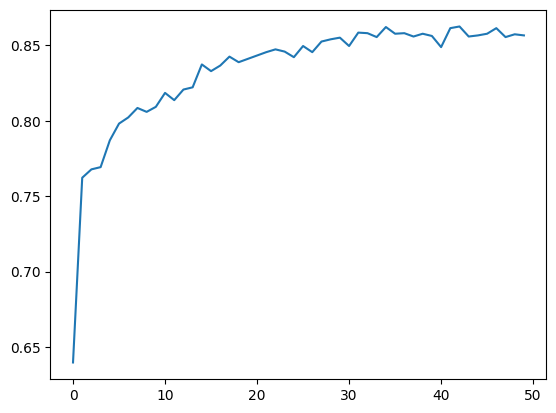

In [43]:
plt.plot(history_eval_acc)

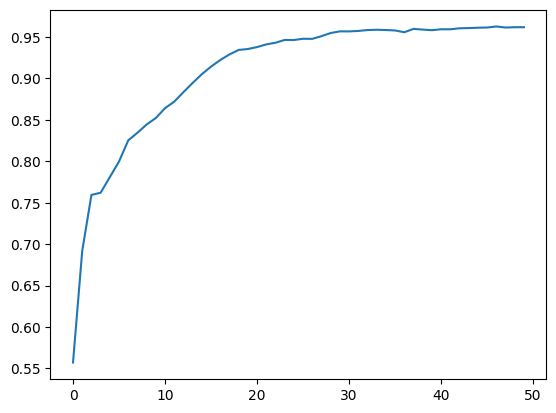

In [44]:
plt.plot(history_train_acc)

# Confusion Matrix

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(3

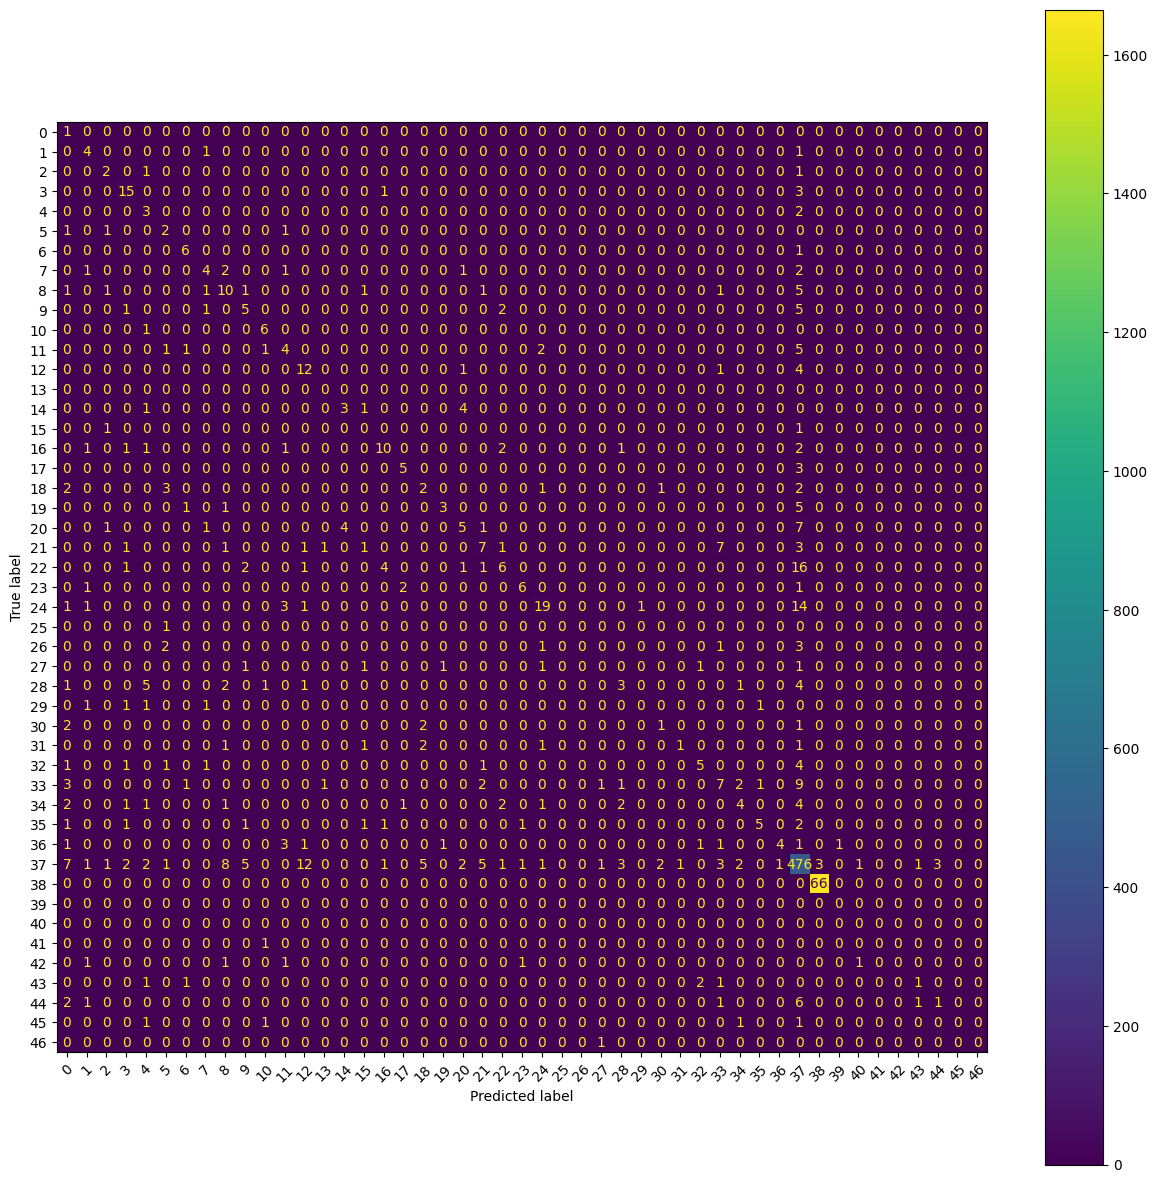

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(15,15))
cm = confusion_matrix(val_true_labels_1d, val_predictions_1d)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# , display_labels=le.classes_
disp.plot(ax=ax)
plt.xticks(rotation = 45)

# EVALUASI BEST MODEL TEST UNIFIED MODEL

## Load Best Model

In [46]:
if (LEARNING_TECHNIQUE == "UM"):
  if (WORD_EMBEDDING == "INDOBERT" and CLASSIFIER == "LINEAR"):
    model_config = AutoConfig.from_pretrained(config['bert_name'])
    model_config.hidden_dropout_prob = config['hidden_dropout_prob']
    model_config.attention_probs_dropout_prob = config['attention_probs_dropout_prob']
    model_config.num_labels = len(le.classes_)
    best_model = transformers.AutoModelForTokenClassification.from_config(model_config)
    # best_model = transformers.AutoModelForTokenClassification.from_pretrained(config['bert_name'],  num_labels = len(le.classes_))
    # best_model.load_state_dict(torch.load("./drive/MyDrive/DataTesis/use/indo_bert__casa_absa"))
  else:
    best_model = TagClassifier(len(le.classes_))

  best_model.load_state_dict(torch.load(config['saved_model_name']))
  best_model = best_model.to(config['device'])

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Calculate Train, Test & Validation Evaluation

### Calculate Validation

In [47]:
if (LEARNING_TECHNIQUE == "UM"):
  valid_loss, valid_predictions, valid_true_labels, valid_id_sentences, valid_ids_token, valid_akurasi = eval_fn_um(data_loader = valid_prod_input_data_loader,
                                                            model=best_model)
  valid_predictions_1d = np.reshape(valid_predictions, (valid_predictions.shape[0] * valid_predictions.shape[1]))
  valid_true_labels_1d = np.reshape(valid_true_labels, (valid_true_labels.shape[0] * valid_true_labels.shape[1]))
  print(classification_report(valid_true_labels_1d, valid_predictions_1d, zero_division = 0))

100%|██████████| 9/9 [00:00<00:00, 45.72it/s]


              precision    recall  f1-score   support

           0       0.04      1.00      0.07         1
           1       0.22      0.33      0.27         6
           2       0.25      0.50      0.33         4
           3       0.52      0.58      0.55        19
           4       0.38      0.60      0.46         5
           5       0.43      0.60      0.50         5
           6       0.64      1.00      0.78         7
           7       0.36      0.36      0.36        11
           8       0.34      0.50      0.41        22
           9       0.31      0.57      0.40        14
          10       0.41      1.00      0.58         7
          11       0.56      0.71      0.63        14
          12       0.57      0.89      0.70        18
          13       0.00      0.00      0.00         0
          14       0.22      0.22      0.22         9
          15       0.00      0.00      0.00         2
          16       0.50      0.47      0.49        19
          17       0.86    

### Calculate Test

In [48]:
if (LEARNING_TECHNIQUE == "UM"):
  test_loss, test_predictions, test_true_labels, test_id_sentences, test_ids_token, test_akurasi = eval_fn_um(data_loader = test_prod_input_data_loader,
                                                            model=best_model)
  test_predictions_1d = np.reshape(test_predictions, (test_predictions.shape[0] * test_predictions.shape[1]))
  test_true_labels_1d = np.reshape(test_true_labels, (test_true_labels.shape[0] * test_true_labels.shape[1]))
  print(classification_report(test_true_labels_1d, test_predictions_1d, zero_division=0))

100%|██████████| 18/18 [00:00<00:00, 42.65it/s]

              precision    recall  f1-score   support

           0       0.09      0.50      0.15        10
           1       0.17      0.29      0.21        14
           2       0.17      0.11      0.13         9
           3       0.25      0.28      0.26        18
           4       0.26      0.56      0.36         9
           5       0.37      0.47      0.41        15
           6       0.64      0.84      0.73        19
           7       0.42      0.50      0.46        36
           8       0.29      0.28      0.28        54
           9       0.41      0.45      0.43        51
          10       0.26      0.58      0.36        12
          11       0.65      0.61      0.63        18
          12       0.57      0.81      0.67        42
          13       0.27      0.14      0.19        21
          14       0.50      0.21      0.30        28
          15       0.36      0.27      0.31        15
          16       0.50      0.23      0.32        52
          17       0.88    

### Calculate Train

In [49]:
if (LEARNING_TECHNIQUE == "UM"):
  train_loss, train_predictions, train_true_labels, train_id_sentences, train_ids_token, train_akurasi = eval_fn_um(data_loader = train_prod_input_data_loader,
                                                            model=best_model)
  train_predictions_1d = np.reshape(train_predictions, (train_predictions.shape[0] * train_predictions.shape[1]))
  train_true_labels_1d = np.reshape(train_true_labels, (train_true_labels.shape[0] * train_true_labels.shape[1]))
  print(classification_report(train_true_labels_1d, train_predictions_1d, zero_division=0))

100%|██████████| 81/81 [00:01<00:00, 41.37it/s]

              precision    recall  f1-score   support

           0       0.07      1.00      0.14        20
           1       0.45      0.97      0.62        36
           2       0.98      0.96      0.97        47
           3       0.73      0.99      0.84       123
           4       0.57      0.95      0.71        40
           5       0.88      0.99      0.93        79
           6       0.88      1.00      0.94        95
           7       0.97      1.00      0.99       150
           8       0.78      0.98      0.87       231
           9       0.91      0.98      0.95       219
          10       0.74      0.98      0.84       101
          11       0.99      0.99      0.99        94
          12       0.90      1.00      0.95       245
          13       0.43      1.00      0.60        19
          14       0.85      0.98      0.91        45
          15       0.61      0.97      0.75        37
          16       0.89      0.95      0.92       146
          17       0.88    

### Print Test Weighted Average, Micro Average, Macro Average Test Dataset

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='weighted'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='weighted'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='weighted'))

  print(precision_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='macro'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='macro'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='macro'))

  print(precision_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='micro'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='micro'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, zero_division=0, average='micro'))

0.8360448780684534
0.8285041532019608
0.8401851851851851
0.33438510480132266
0.29347440117190854
0.28539990468265725
0.8401851851851851
0.8401851851851851
0.8401851851851851


### Print Test Weighted Average, Micro Average, Macro Average Validation Dataset

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='weighted'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='weighted'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='weighted'))

  print(precision_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='macro'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='macro'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='macro'))

  print(precision_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='micro'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='micro'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, zero_division=0, average='micro'))

0.8632041496706393
0.8595266836155829
0.8625925925925926
0.3214292686674933
0.35936903882413035
0.31635063779252376
0.8625925925925926
0.8625925925925926
0.8625925925925926


## Confusion Matrix Test Dataset

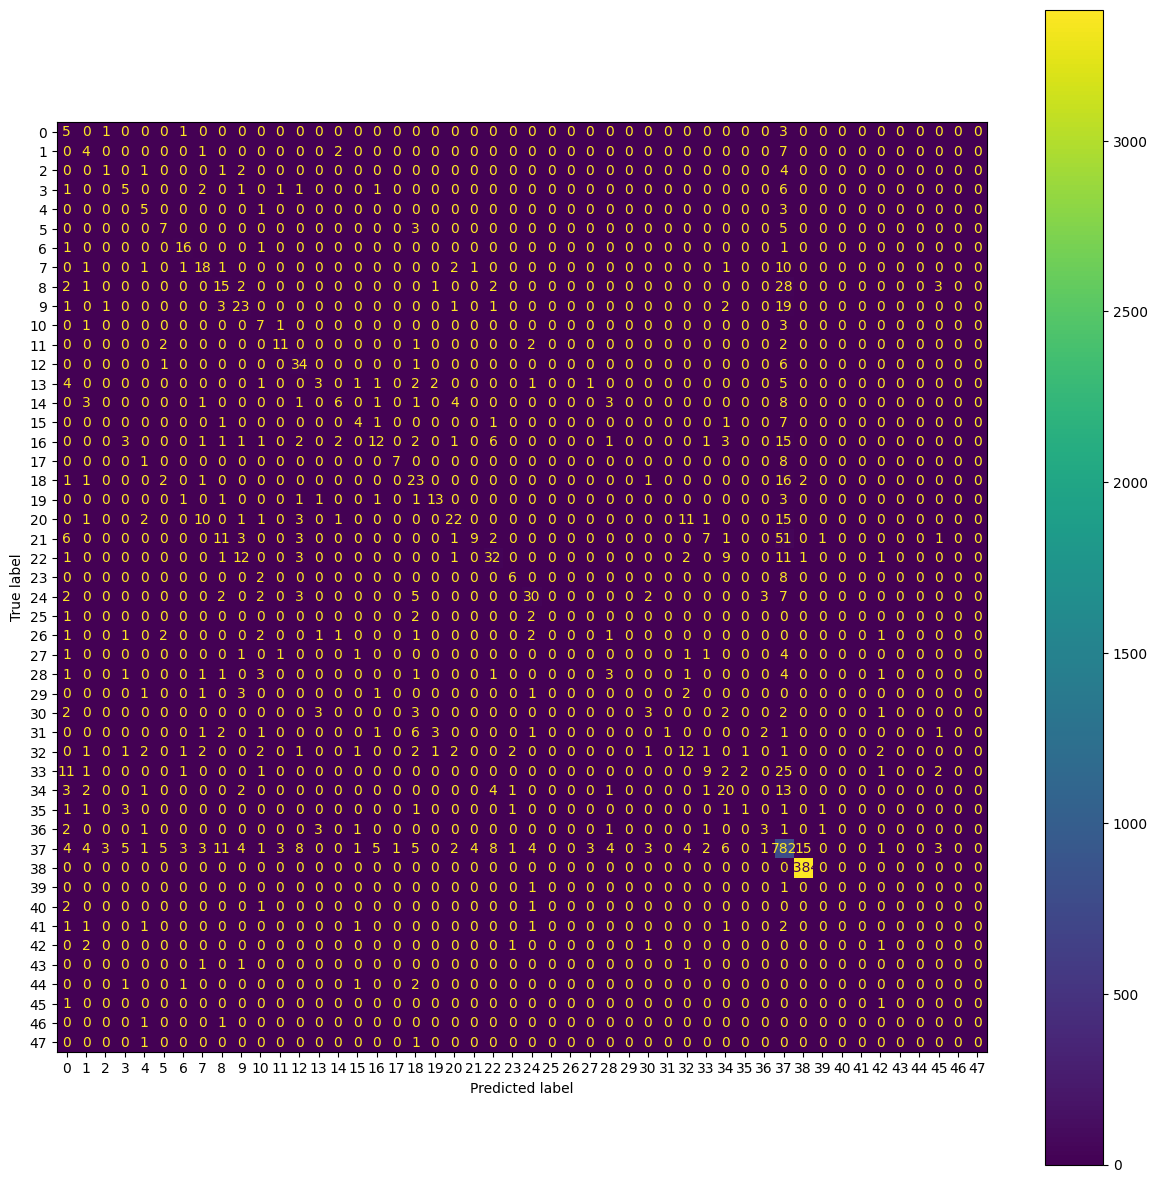

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "UM"):
  fig, ax = plt.subplots(figsize=(15,15))
  cm = confusion_matrix(test_true_labels_1d, test_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

## Confusion Matrix Validation Dataset

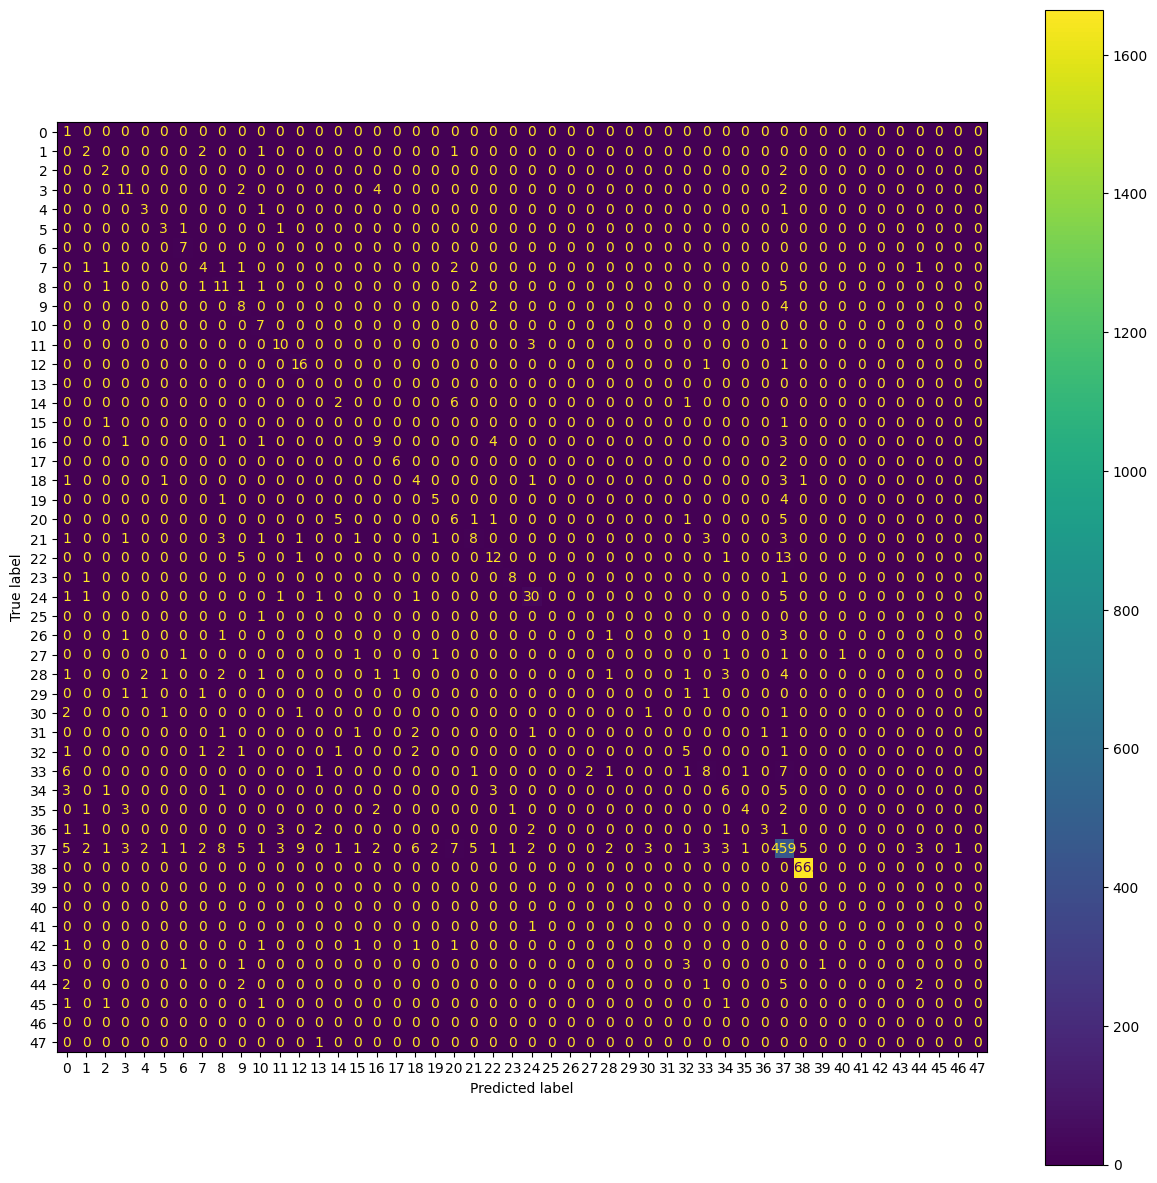

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "UM"):
  fig, ax = plt.subplots(figsize=(15,15))
  cm = confusion_matrix(valid_true_labels_1d, valid_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

# EVALUASI TEST ASPECT SENTIMENT CLASSIFICATION UNIFIED MODEL

## Transform Test Data to Data Union

In [54]:
if (LEARNING_TECHNIQUE == "UM"):
  if (WORD_EMBEDDING == 'INDOBERT'):
    df_test_decode = pd.DataFrame({})
    for i in range(test_id_sentences.shape[0]):
      for j in range(test_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': test_id_sentences[i,j],
            'token': config['tokenizer'].convert_ids_to_tokens([test_ids_token[i,j]]),
            'true_id': test_true_labels[i,j],
            'predictions_id': test_predictions[i,j],
            'true': le.inverse_transform([test_true_labels[i,j]]),
            'predictions': le.inverse_transform([test_predictions[i,j]])
        })
        df_test_decode = pd.concat([df_test_decode, baris])

    df_test_decode.to_csv('./df_test_decode_union'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_test_decode.head()
  else:
    df_test_decode = pd.DataFrame({})
    for i in range(test_id_sentences.shape[0]):
      sentences = test_ids_token[i]
      word_arr = sentences.split(" ")
      for j in range(test_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': test_id_sentences[i,j],
            'token': word_arr[j],
            'true_id': test_true_labels[i,j],
            'predictions_id': test_predictions[i,j],
            'true': le.inverse_transform([test_true_labels[i,j]]),
            'predictions': le.inverse_transform([test_predictions[i,j]])
        })
        df_test_decode = pd.concat([df_test_decode, baris])

    df_test_decode.to_csv('./df_test_decode_union'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_test_decode.head()

## Load DF

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score

if (LEARNING_TECHNIQUE == "UM"):
  df_test_union = pd.read_csv('./df_test_decode_union'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv')
  df_test_union.token.replace(np.NaN, 'nan', inplace=True)
  df_test_union.head()

  df_test_union_based = df_test_union

## Function Transform Label

In [56]:
def get_sentiment_value(sentiment):
  if(sentiment == "POS"):
    return 1
  elif(sentiment == "NEG"):
    return -1
  else:
    return 0

def get_sentiment_code(sentiment_value):
  if(sentiment_value > 0):
    return 'POS'
  elif(sentiment_value < 0):
    return 'NEG'
  else:
    return 'NEU'

def sparate_predictions_union(series):
  position = []
  sentiment = []
  aspect = []
  sentiment_polarity = []
  sentiment_value = []

  for data in series:
    res = data.split("-")

    if (len(res) == 1) :
      position.append(res[0])
      sentiment.append('')
      aspect.append('')
      sentiment_value.append(get_sentiment_value(res[0]))
      sentiment_polarity.append(res[0])
    elif (len(res) == 2) :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append('')
      sentiment_value.append(get_sentiment_value(res[1]))
      sentiment_polarity.append(res[1])
    else :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append(res[2])
      sentiment_value.append(get_sentiment_value(res[1]))
      sentiment_polarity.append(res[1]+"-"+res[2])

  return position, sentiment, aspect, sentiment_polarity, sentiment_value

## Call Function Prediction

In [57]:
if (LEARNING_TECHNIQUE == "UM"):
  position, sentiments, aspects, sentiment_polarity, sentiment_value = sparate_predictions_union(df_test_union.predictions)
  df_test_union['position_prediction'] = position
  df_test_union['sentiment_prediction'] = sentiments
  df_test_union['aspect_prediction'] = aspects
  df_test_union['sentiment_polarity_prediction'] = sentiment_polarity
  df_test_union['sentiment_value'] = sentiment_value
  df_test_union.head()

## Call Function Target

In [58]:
if (LEARNING_TECHNIQUE == "UM"):
  position, sentiments, aspects, sentiment_polarity, _ = sparate_predictions_union(df_test_union.true)
  df_test_union['position_true'] = position
  df_test_union['sentiment_true'] = sentiments
  df_test_union['aspect_true'] = aspects
  df_test_union['sentiment_polarity_true'] = sentiment_polarity
  df_test_union.head()

## ATE

### Print Classification Report ATE

In [59]:
if (LEARNING_TECHNIQUE == "UM"):
  pred_1d = df_test_union.position_prediction.values
  target_1d = df_test_union.position_true.values

  print(confusion_matrix(target_1d, pred_1d))
  print(classification_report(target_1d, pred_1d))

[[ 150    1   17    3   91    0    3]
 [   1   34    1    0    6    0    0]
 [  82   16  206   47  154    3    3]
 [  67    1   50   74   52    0   11]
 [  47    8   31   23  782   15    4]
 [   0    0    0    0    0 3384    0]
 [  16    0    9    3    3    0    2]]
              precision    recall  f1-score   support

           B       0.41      0.57      0.48       265
           C       0.57      0.81      0.67        42
           I       0.66      0.40      0.50       511
           L       0.49      0.29      0.37       255
           O       0.72      0.86      0.78       910
         PAD       0.99      1.00      1.00      3384
           U       0.09      0.06      0.07        33

    accuracy                           0.86      5400
   macro avg       0.56      0.57      0.55      5400
weighted avg       0.86      0.86      0.85      5400



### Print Test Weighted Average, Micro Average, Macro Average ATE

In [60]:
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(target_1d, pred_1d, average='weighted'))
  print(f1_score(target_1d, pred_1d, average='weighted'))
  print(recall_score(target_1d, pred_1d, average='weighted'))

  print(precision_score(target_1d, pred_1d, average='macro'))
  print(recall_score(target_1d, pred_1d, average='macro'))
  print(f1_score(target_1d, pred_1d, average='macro'))

  print(precision_score(target_1d, pred_1d, average='micro'))
  print(recall_score(target_1d, pred_1d, average='micro'))
  print(f1_score(target_1d, pred_1d, average='micro'))

0.8550691618075176
0.8504965171799826
0.8577777777777778
0.5613842303368579
0.5698336370301201
0.5515369350732743
0.8577777777777778
0.8577777777777778
0.8577777777777779


### Print Confusion Matrix ATE

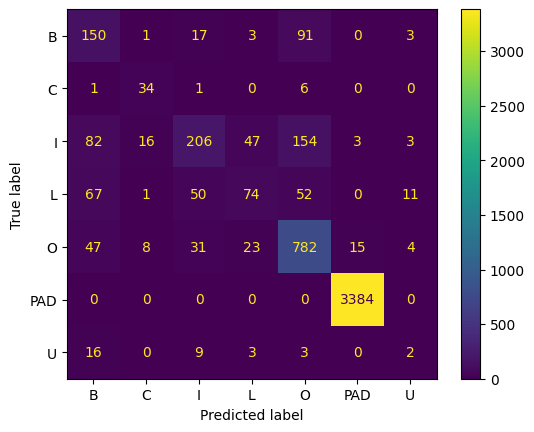

In [61]:
if (LEARNING_TECHNIQUE == "UM"):
  cm = confusion_matrix(target_1d, pred_1d)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['B','C', 'I', 'L', 'O', 'PAD', 'U'])
  cm_display.plot()
  plt.show()

## SP

### Print Classification Report SP

In [62]:
if (LEARNING_TECHNIQUE == "UM"):
  pred_1d = df_test_union.sentiment_polarity_prediction.values
  target_1d = df_test_union.sentiment_polarity_true.values

  print(confusion_matrix(target_1d, pred_1d))
  print(classification_report(target_1d, pred_1d, zero_division=0))

[[  13    0    3    1    0    4    9    0    3    0    0    0    1    4]
 [   4   16    0    7    0    4   16    0    0    6    0    0    3    3]
 [   2    1    7    1    2    0   17    0    0    1    3    6    0    2]
 [   2    4    0   28    0    4   28    0    0    6    3   12    5    1]
 [   0    0    0    1   14    0   11    0    0    5    0    4    1    1]
 [   6    1    0    1    0   42   23    2    0    1    0    2    0    0]
 [   4    4    7   15    2   15  830   15    3    9   20   18    2    8]
 [   0    0    0    0    0    0    0 3384    0    0    0    0    0    0]
 [   2    0    1    3    0    9    6    0   35    1    4    0    2    3]
 [   0    4    1    3    5    3   30    0    3   79    4    2    6    0]
 [  21    2    0    2    0    0  107    0    2    1   57   12    3    0]
 [   5    2    1    2    2    0   46    1    0    4    6  105    1    0]
 [   2    2    0    3    1    2   12    0    0    0    0    1   17    1]
 [   8    0    1    1    1   10   13    0    0    0

### Print Test Weighted Average, Micro Average, Macro Average SP

In [63]:
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(target_1d, pred_1d, average='weighted'))
  print(f1_score(target_1d, pred_1d, average='weighted'))
  print(recall_score(target_1d, pred_1d, average='weighted'))

  print(precision_score(target_1d, pred_1d, average='macro'))
  print(recall_score(target_1d, pred_1d, average='macro'))
  print(f1_score(target_1d, pred_1d, average='macro'))

  print(precision_score(target_1d, pred_1d, average='micro'))
  print(recall_score(target_1d, pred_1d, average='micro'))
  print(f1_score(target_1d, pred_1d, average='micro'))

0.8611263495291548
0.8588781382827249
0.8659259259259259
0.558558740233752
0.4865089776603155
0.5091201106071689
0.8659259259259259
0.8659259259259259
0.8659259259259259


### Print Confusion Matrix SP

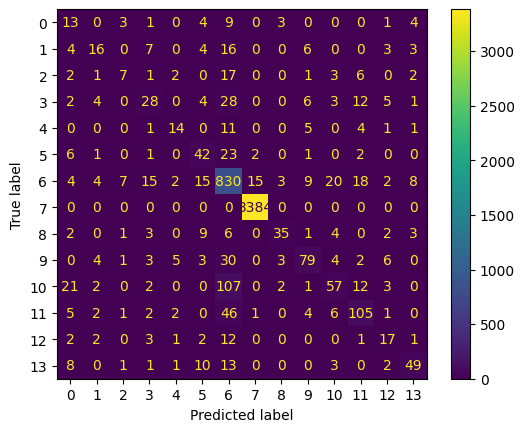

In [64]:
if (LEARNING_TECHNIQUE == "UM"):
  cm = confusion_matrix(target_1d, pred_1d)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, )
  # cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[
  #     'NEG-FUEL','NEG-MACHINE', 'NEG-OTHERS', 'NEG-PART', 'NEG-PRICE', 'NEG-SERVICE', 'NEU', 'PAD',
  #     'POS-FUEL','POS-MACHINE', 'POS-OTHERS', 'POS-PART', 'POS-PRICE', 'POS-SERVICE',
  #     ])
  cm_display.plot()
  plt.show()

## Aspect Sentiment Classification

### Function ASC

In [65]:
def target_normalize(sentiment):
  if (sentiment == 'neutral'):
    return "NEU"
  elif (sentiment == 'negative'):
    return "NEG"
  else:
    return "POS"

### Normalisasi Data Test ASC

In [66]:
if (LEARNING_TECHNIQUE == "UM"):
  df_test_ori = pd.read_csv(DATA_TEST_ORI_PATH)
  df_test_ori['fuel_norm'] = df_test_ori['fuel'].apply(lambda x: target_normalize(x))
  df_test_ori['machine_norm'] = df_test_ori['machine'].apply(lambda x: target_normalize(x))
  df_test_ori['others_norm'] = df_test_ori['others'].apply(lambda x: target_normalize(x))
  df_test_ori['part_norm'] = df_test_ori['part'].apply(lambda x: target_normalize(x))
  df_test_ori['price_norm'] = df_test_ori['price'].apply(lambda x: target_normalize(x))
  df_test_ori['service_norm'] = df_test_ori['service'].apply(lambda x: target_normalize(x))
  df_test_ori.head()

### Transform Sequence Labelling to ASC

In [67]:
if (LEARNING_TECHNIQUE == "UM"):
  df_summary_sentiment_union = pd.DataFrame({})
  for id_key in [id for id in df_test_union_based['id_sentence'].unique() if id != -1]:
    summary_sentiment = {}
    data_test_pred = df_test_union_based[df_test_union_based['id_sentence'] == id_key]
    # for aspect in df_test_union_based['aspect_prediction'].unique():
    for aspect in ['FUEL', 'MACHINE', 'OTHERS', 'PART', 'PRICE', 'SERVICE']:
      data = data_test_pred[data_test_pred['aspect_prediction'] == aspect]
      summary_sentiment[aspect] = get_sentiment_code(data.sentiment_value.sum())

    df_summary_sentiment_union = pd.concat([df_summary_sentiment_union, pd.DataFrame([{
      'no': id_key,
      'sentence': ' '.join(data_test_pred.token),
      'fuel':summary_sentiment['FUEL'],
      'machine':summary_sentiment['MACHINE'],
      'others':summary_sentiment['OTHERS'],
      'part':summary_sentiment['PART'],
      'price':summary_sentiment['PRICE'],
      'service':summary_sentiment['SERVICE'],
    }])])

### Unravel ASC to row

In [68]:
if (LEARNING_TECHNIQUE == "UM"):
  df_union_res_compare = pd.DataFrame({})

  for id_key in df_test_ori['no'].unique():
    data_actual = df_test_ori[df_test_ori['no'] == id_key]
    data_pred = df_summary_sentiment_union[df_summary_sentiment_union['no'] == id_key]
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.fuel.values[0],
        'y_target':data_actual.fuel_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.machine.values[0],
        'y_target':data_actual.machine_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.others.values[0],
        'y_target':data_actual.others_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.part.values[0],
        'y_target':data_actual.part_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.price.values[0],
        'y_target':data_actual.price_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.service.values[0],
        'y_target':data_actual.service_norm.values[0],
      }])
    ])

### Print Classification Report ASC

In [69]:
if (LEARNING_TECHNIQUE == "UM"):
  print(confusion_matrix(df_union_res_compare.y_target, df_union_res_compare.y_pred))
  print(classification_report(df_union_res_compare.y_target, df_union_res_compare.y_pred, zero_division=0))

[[ 42  15  17]
 [127 637  90]
 [  4  26 122]]
              precision    recall  f1-score   support

         NEG       0.24      0.57      0.34        74
         NEU       0.94      0.75      0.83       854
         POS       0.53      0.80      0.64       152

    accuracy                           0.74      1080
   macro avg       0.57      0.71      0.60      1080
weighted avg       0.83      0.74      0.77      1080



### Print Test Weighted Average, Micro Average, Macro Average ASC

In [70]:
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='weighted'))
  print(f1_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='weighted'))
  print(recall_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='weighted'))

  print(precision_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='macro'))
  print(recall_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='macro'))
  print(f1_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='macro'))

  print(precision_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='micro'))
  print(recall_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='micro'))
  print(f1_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='micro'))

0.8345374222327149
0.7710092412794397
0.7416666666666667
0.571684560591955
0.7053669286197328
0.6040312028205067
0.7416666666666667
0.7416666666666667
0.7416666666666667


### Print Confusion Matrix ASC

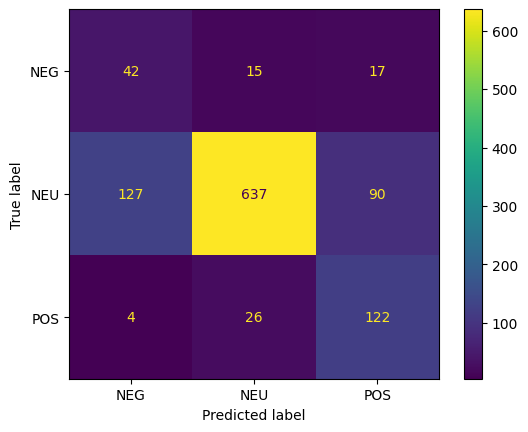

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "UM"):
  cm = confusion_matrix(df_union_res_compare.y_target, df_union_res_compare.y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['NEG','NEU', 'POS'])
  cm_display.plot()
  plt.show()

# EVALUASI VALIDATION ASPECT SENTIMENT CLASSIFICATION UNIFIED MODEL

## Transform Validation Data to Data Union

In [72]:
if (LEARNING_TECHNIQUE == "UM"):
  if (WORD_EMBEDDING == 'INDOBERT'):
    df_valid_decode = pd.DataFrame({})
    for i in range(valid_id_sentences.shape[0]):
      for j in range(valid_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': valid_id_sentences[i,j],
            'token': config['tokenizer'].convert_ids_to_tokens([valid_ids_token[i,j]]),
            'true_id': valid_true_labels[i,j],
            'predictions_id': valid_predictions[i,j],
            'true': le.inverse_transform([valid_true_labels[i,j]]),
            'predictions': le.inverse_transform([valid_predictions[i,j]])
        })
        df_valid_decode = pd.concat([df_valid_decode, baris])

    df_valid_decode.to_csv('./df_valid_decode_union'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_valid_decode.head()
  else:
    df_valid_decode = pd.DataFrame({})
    for i in range(valid_id_sentences.shape[0]):
      sentences = valid_ids_token[i]
      word_arr = sentences.split(" ")
      for j in range(valid_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': valid_id_sentences[i,j],
            'token': word_arr[j],
            'true_id': valid_true_labels[i,j],
            'predictions_id': valid_predictions[i,j],
            'true': le.inverse_transform([valid_true_labels[i,j]]),
            'predictions': le.inverse_transform([valid_predictions[i,j]])
        })
        df_valid_decode = pd.concat([df_valid_decode, baris])

    df_valid_decode.to_csv('./df_valid_decode_union'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_valid_decode.head()

## Load DF

In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score

if (LEARNING_TECHNIQUE == "UM"):
  df_valid_union = pd.read_csv('./df_valid_decode_union'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv')
  df_valid_union.token.replace(np.NaN, 'nan', inplace=True)
  df_valid_union.head()

  df_valid_union_based = df_valid_union

## Function Transform Label

In [74]:
def get_sentiment_value(sentiment):
  if(sentiment == "POS"):
    return 1
  elif(sentiment == "NEG"):
    return -1
  else:
    return 0

def get_sentiment_code(sentiment_value):
  if(sentiment_value > 0):
    return 'POS'
  elif(sentiment_value < 0):
    return 'NEG'
  else:
    return 'NEU'

def sparate_predictions_union(series):
  position = []
  sentiment = []
  aspect = []
  sentiment_polarity = []
  sentiment_value = []

  for data in series:
    res = data.split("-")

    if (len(res) == 1) :
      position.append(res[0])
      sentiment.append('')
      aspect.append('')
      sentiment_value.append(get_sentiment_value(res[0]))
      sentiment_polarity.append(res[0])
    elif (len(res) == 2) :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append('')
      sentiment_value.append(get_sentiment_value(res[1]))
      sentiment_polarity.append(res[1])
    else :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append(res[2])
      sentiment_value.append(get_sentiment_value(res[1]))
      sentiment_polarity.append(res[1]+"-"+res[2])

  return position, sentiment, aspect, sentiment_polarity, sentiment_value

## Call Function Prediction

In [75]:
if (LEARNING_TECHNIQUE == "UM"):
  position, sentiments, aspects, sentiment_polarity, sentiment_value = sparate_predictions_union(df_valid_union.predictions)
  df_valid_union['position_prediction'] = position
  df_valid_union['sentiment_prediction'] = sentiments
  df_valid_union['aspect_prediction'] = aspects
  df_valid_union['sentiment_polarity_prediction'] = sentiment_polarity
  df_valid_union['sentiment_value'] = sentiment_value
  df_valid_union.head()

## Call Function Target

In [76]:
if (LEARNING_TECHNIQUE == "UM"):
  position, sentiments, aspects, sentiment_polarity, _ = sparate_predictions_union(df_valid_union.true)
  df_valid_union['position_true'] = position
  df_valid_union['sentiment_true'] = sentiments
  df_valid_union['aspect_true'] = aspects
  df_valid_union['sentiment_polarity_true'] = sentiment_polarity
  df_valid_union.head()

## ATE

### Print Classification Report ATE

In [77]:
if (LEARNING_TECHNIQUE == "UM"):
  pred_1d = df_valid_union.position_prediction.values
  target_1d = df_valid_union.position_true.values

  print(confusion_matrix(target_1d, pred_1d))
  print(classification_report(target_1d, pred_1d))

[[  85    0   14    0   15    0    1]
 [   0   16    0    1    1    0    0]
 [  22    2  112    6   40    1    0]
 [  43    1   23   44   26    0    1]
 [  34    9   28   13  459    5    4]
 [   0    0    0    0    0 1665    0]
 [  11    0    5    5    5    0    3]]
              precision    recall  f1-score   support

           B       0.44      0.74      0.55       115
           C       0.57      0.89      0.70        18
           I       0.62      0.61      0.61       183
           L       0.64      0.32      0.43       138
           O       0.84      0.83      0.84       552
         PAD       1.00      1.00      1.00      1665
           U       0.33      0.10      0.16        29

    accuracy                           0.88      2700
   macro avg       0.63      0.64      0.61      2700
weighted avg       0.89      0.88      0.88      2700



### Print valid Weighted Average, Micro Average, Macro Average ATE

In [78]:
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(target_1d, pred_1d, average='weighted'))
  print(f1_score(target_1d, pred_1d, average='weighted'))
  print(recall_score(target_1d, pred_1d, average='weighted'))
    
  print(precision_score(target_1d, pred_1d, average='macro'))
  print(recall_score(target_1d, pred_1d, average='macro'))
  print(f1_score(target_1d, pred_1d, average='macro'))

  print(precision_score(target_1d, pred_1d, average='micro'))
  print(recall_score(target_1d, pred_1d, average='micro'))
  print(f1_score(target_1d, pred_1d, average='micro'))


0.8865783224909496
0.879500855931255
0.882962962962963
0.6329705416929565
0.6419788251853777
0.6107172033189431
0.882962962962963
0.882962962962963
0.882962962962963


### Print Confusion Matrix ATE

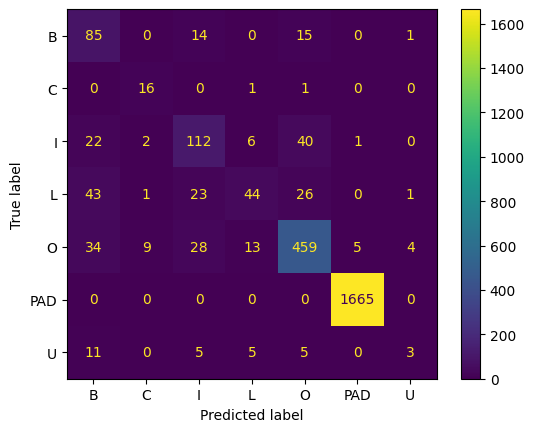

In [79]:
if (LEARNING_TECHNIQUE == "UM"):
  cm = confusion_matrix(target_1d, pred_1d)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['B','C', 'I', 'L', 'O', 'PAD', 'U'])
  cm_display.plot()
  plt.show()

## SP

### Print Classification Report SP

In [80]:
if (LEARNING_TECHNIQUE == "UM"):
  pred_1d = df_valid_union.sentiment_polarity_prediction.values
  target_1d = df_valid_union.sentiment_polarity_true.values

  print(confusion_matrix(target_1d, pred_1d))
  print(classification_report(target_1d, pred_1d, zero_division=0))

[[   1    0    0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    4    0    2    0    0    3    0    0   10    2    0    1    0]
 [   0    0    4    1    0    0    4    0    2    0    0    1    0    0]
 [   1    0    0   27    3    1    9    0    0    1    3    9    2    0]
 [   0    0    0    1   10    0    3    0    0    2    1    0    1    1]
 [   3    0    0    0    0   10    5    1    1    0    0    0    0    2]
 [   5    3    2    7    2   10  485    5    3   10   20    9    4    5]
 [   0    0    0    0    0    0    0 1665    0    0    0    0    0    0]
 [   1    0    2    0    0    3    5    0   12    1    2    0    1    2]
 [   2    7    1    0    0    2    6    0    1   22    5    4    0    0]
 [  10    0    4    2    0    0   21    0    1    2   39    3    3    0]
 [   4    0    2    0    0    0   23    0    0    0    1   38    1    0]
 [   0    2    0    5    0    0    3    0    0    0    0    0   20    0]
 [   6    2    0    0    0    1    7    0    0    0

### Print valid Weighted Average, Micro Average, Macro Average SP

In [81]:
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(target_1d, pred_1d, average='weighted'))
  print(f1_score(target_1d, pred_1d, average='weighted'))
  print(recall_score(target_1d, pred_1d, average='weighted'))
    
  print(precision_score(target_1d, pred_1d, average='macro'))
  print(recall_score(target_1d, pred_1d, average='macro'))
  print(f1_score(target_1d, pred_1d, average='macro'))

  print(precision_score(target_1d, pred_1d, average='micro'))
  print(recall_score(target_1d, pred_1d, average='micro'))
  print(f1_score(target_1d, pred_1d, average='micro'))


0.8906630283273641
0.8869459741093405
0.8848148148148148
0.5429804494268492
0.5437617096364022
0.5249356014368556
0.8848148148148148
0.8848148148148148
0.8848148148148148


### Print Confusion Matrix SP

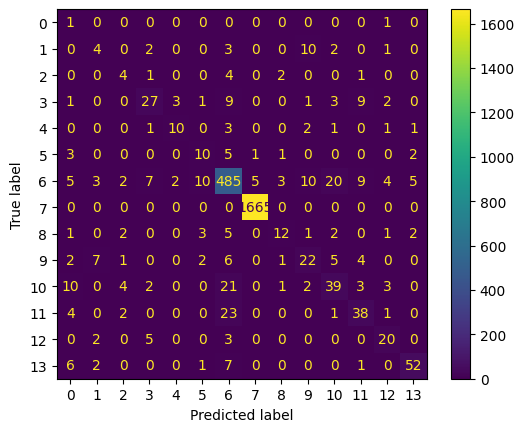

In [82]:
if (LEARNING_TECHNIQUE == "UM"):
  cm = confusion_matrix(target_1d, pred_1d)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, )
  # cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[
  #     'NEG-FUEL','NEG-MACHINE', 'NEG-OTHERS', 'NEG-PART', 'NEG-PRICE', 'NEG-SERVICE', 'NEU', 'PAD',
  #     'POS-FUEL','POS-MACHINE', 'POS-OTHERS', 'POS-PART', 'POS-PRICE', 'POS-SERVICE',
  #     ])
  cm_display.plot()
  plt.show()

## Aspect Sentiment Classification

### Function ASC

In [83]:
def target_normalize(sentiment):
  if (sentiment == 'neutral'):
    return "NEU"
  elif (sentiment == 'negative'):
    return "NEG"
  else:
    return "POS"

### Normalisasi Data valid ASC

In [84]:
if (LEARNING_TECHNIQUE == "UM"):
  df_valid_ori = pd.read_csv(DATA_VALID_ORI_PATH)
  df_valid_ori['fuel_norm'] = df_valid_ori['fuel'].apply(lambda x: target_normalize(x))
  df_valid_ori['machine_norm'] = df_valid_ori['machine'].apply(lambda x: target_normalize(x))
  df_valid_ori['others_norm'] = df_valid_ori['others'].apply(lambda x: target_normalize(x))
  df_valid_ori['part_norm'] = df_valid_ori['part'].apply(lambda x: target_normalize(x))
  df_valid_ori['price_norm'] = df_valid_ori['price'].apply(lambda x: target_normalize(x))
  df_valid_ori['service_norm'] = df_valid_ori['service'].apply(lambda x: target_normalize(x))
  df_valid_ori.head()

### Transform Sequence Labelling to ASC

In [85]:
if (LEARNING_TECHNIQUE == "UM"):
  df_summary_sentiment_union = pd.DataFrame({})
  for id_key in [id for id in df_valid_union_based['id_sentence'].unique() if id != -1]:
    summary_sentiment = {}
    data_valid_pred = df_valid_union_based[df_valid_union_based['id_sentence'] == id_key]
    # for aspect in df_valid_union_based['aspect_prediction'].unique():
    for aspect in ['FUEL', 'MACHINE', 'OTHERS', 'PART', 'PRICE', 'SERVICE']:
      data = data_valid_pred[data_valid_pred['aspect_prediction'] == aspect]
      summary_sentiment[aspect] = get_sentiment_code(data.sentiment_value.sum())

    df_summary_sentiment_union = pd.concat([df_summary_sentiment_union, pd.DataFrame([{
      'no': id_key,
      'sentence': ' '.join(data_valid_pred.token),
      'fuel':summary_sentiment['FUEL'],
      'machine':summary_sentiment['MACHINE'],
      'others':summary_sentiment['OTHERS'],
      'part':summary_sentiment['PART'],
      'price':summary_sentiment['PRICE'],
      'service':summary_sentiment['SERVICE'],
    }])])

### Unravel ASC to row

In [86]:
if (LEARNING_TECHNIQUE == "UM"):
  df_union_res_compare = pd.DataFrame({})

  for id_key in df_valid_ori['no'].unique():
    data_actual = df_valid_ori[df_valid_ori['no'] == id_key]
    data_pred = df_summary_sentiment_union[df_summary_sentiment_union['no'] == id_key]
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.fuel.values[0],
        'y_target':data_actual.fuel_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.machine.values[0],
        'y_target':data_actual.machine_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.others.values[0],
        'y_target':data_actual.others_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.part.values[0],
        'y_target':data_actual.part_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.price.values[0],
        'y_target':data_actual.price_norm.values[0],
      }])
    ])
    df_union_res_compare = pd.concat([
      df_union_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.service.values[0],
        'y_target':data_actual.service_norm.values[0],
      }])
    ])

### Print Classification Report ASC

In [87]:
if (LEARNING_TECHNIQUE == "UM"):
  print(confusion_matrix(df_union_res_compare.y_target, df_union_res_compare.y_pred))
  print(classification_report(df_union_res_compare.y_target, df_union_res_compare.y_pred, zero_division=0))

[[ 19   8   8]
 [ 59 322  44]
 [  6  13  61]]
              precision    recall  f1-score   support

         NEG       0.23      0.54      0.32        35
         NEU       0.94      0.76      0.84       425
         POS       0.54      0.76      0.63        80

    accuracy                           0.74       540
   macro avg       0.57      0.69      0.60       540
weighted avg       0.83      0.74      0.77       540



### Print valid Weighted Average, Micro Average, Macro Average ASC

In [88]:
if (LEARNING_TECHNIQUE == "UM"):
  print(precision_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='weighted'))
  print(f1_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='weighted'))
  print(recall_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='weighted'))

  print(precision_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='macro'))
  print(recall_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='macro'))
  print(f1_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='macro'))

  print(precision_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='micro'))
  print(recall_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='micro'))
  print(f1_score(df_union_res_compare.y_target, df_union_res_compare.y_pred, average='micro'))

0.833485368909937
0.7743085687186985
0.7444444444444445
0.5682629984147051
0.6876680672268908
0.59666458336357
0.7444444444444445
0.7444444444444445
0.7444444444444445


### Print Confusion Matrix ASC

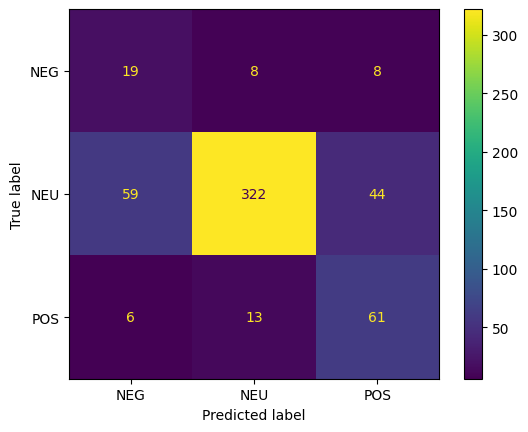

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "UM"):
  cm = confusion_matrix(df_union_res_compare.y_target, df_union_res_compare.y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['NEG','NEU', 'POS'])
  cm_display.plot()
  plt.show()

# EVALUASI BEST MODEL TEST ATE JOINT ASPECT POLARITY

## Load Best Model

In [90]:
if (LEARNING_TECHNIQUE == "JAP"):
  if (WORD_EMBEDDING == "INDOBERT" and CLASSIFIER == "LINEAR"):
    model_config = AutoConfig.from_pretrained(config['bert_name'])
    model_config.hidden_dropout_prob = config['hidden_dropout_prob']
    model_config.attention_probs_dropout_prob = config['attention_probs_dropout_prob']
    model_config.num_labels = len(le_sentiment.classes_)
    best_model_tag = transformers.AutoModelForTokenClassification.from_config(model_config)
  # best_model_tag = transformers.AutoModelForTokenClassification.from_pretrained(config['bert_name'],  num_labels = len(le.classes_))
  # best_model_tag.load_state_dict(torch.load("indo_bert_tag_casa_absa-30"))
  else:
    best_model_tag = TagClassifier(len(le_sentiment.classes_))

  best_model_tag.load_state_dict(torch.load("./"+ config['saved_model_name_tag']))
  best_model_tag = best_model_tag.to(config['device'])

## Calculate Train , Test & Validation Evaluation

### Calculate Validation

In [91]:
if (LEARNING_TECHNIQUE == "JAP"):
  valid_loss, valid_predictions, valid_true_labels, valid_id_sentences, valid_ids_token, valid_accuracy = eval_tag_fn_jap(data_loader = valid_prod_input_data_loader,
                                                            model=best_model_tag)
  valid_predictions_1d = np.reshape(valid_predictions, (valid_predictions.shape[0] * valid_predictions.shape[1]))
  valid_true_labels_1d = np.reshape(valid_true_labels, (valid_true_labels.shape[0] * valid_true_labels.shape[1]))
  print(classification_report(valid_true_labels_1d, valid_predictions_1d,  zero_division=0))

### Calculate Test

In [92]:
if (LEARNING_TECHNIQUE == "JAP"):
  test_loss, test_predictions, test_true_labels, test_id_sentences, test_ids_token, test_akurasi = eval_tag_fn_jap(data_loader = test_prod_input_data_loader,
                                                            model=best_model_tag)
  test_predictions_1d = np.reshape(test_predictions, (test_predictions.shape[0] * test_predictions.shape[1]))
  test_true_labels_1d = np.reshape(test_true_labels, (test_true_labels.shape[0] * test_true_labels.shape[1]))
  print(classification_report(test_true_labels_1d, test_predictions_1d, zero_division=0))

### Calculate Train

In [93]:
if (LEARNING_TECHNIQUE == "JAP"):
  train_loss, train_predictions, train_true_labels, train_id_sentences, train_ids_token, train_akurasi = eval_tag_fn_jap(data_loader = train_prod_input_data_loader,
                                                            model=best_model_tag)
  train_predictions_1d = np.reshape(train_predictions, (train_predictions.shape[0] * train_predictions.shape[1]))
  train_true_labels_1d = np.reshape(train_true_labels, (train_true_labels.shape[0] * train_true_labels.shape[1]))
  print(classification_report(train_true_labels_1d, train_predictions_1d, zero_division=0))

### Print Test Weighted Average, Micro Average, Macro Average

In [94]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(precision_score(test_true_labels_1d, test_predictions_1d, average='weighted'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, average='weighted'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, average='weighted'))

  print(precision_score(test_true_labels_1d, test_predictions_1d, average='macro'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, average='macro'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, average='macro'))

  print(precision_score(test_true_labels_1d, test_predictions_1d, average='micro'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, average='micro'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, average='micro'))

### Print Validation Weighted Average, Micro Average, Macro Average

In [95]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(precision_score(valid_true_labels_1d, valid_predictions_1d, average='weighted'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, average='weighted'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, average='weighted'))

  print(precision_score(valid_true_labels_1d, valid_predictions_1d, average='macro'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, average='macro'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, average='macro'))

  print(precision_score(valid_true_labels_1d, valid_predictions_1d, average='micro'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, average='micro'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, average='micro'))

## Confusion Matrix Test Dataset

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  fig, ax = plt.subplots(figsize=(15,15))
  cm = confusion_matrix(test_true_labels_1d, test_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

## Confusion Matrix Validation Dataset

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  fig, ax = plt.subplots(figsize=(15,15))
  cm = confusion_matrix(valid_true_labels_1d, valid_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

# TRANSFER LEARNING JOINT ASPECT POLARITY SENTIMENT POLARITY

## Call Function (SP)

In [98]:
if (LEARNING_TECHNIQUE == "JAP"):
  model, val_predictions, val_true_labels, history_eval_acc, history_train_acc = train_sentiment_engine(epoch=config['Epoch'],
                                                        train_data=train_prod_input_data_loader,
                                                        valid_data=valid_prod_input_data_loader,
                                                        label_encoder=le_sentiment,
                                                        model=best_model_tag)

## Hitung Evaluasi Validasi SP

In [99]:
if (LEARNING_TECHNIQUE == "JAP"):
  val_predictions_1d = np.reshape(val_predictions, (val_predictions.shape[0] * val_predictions.shape[1]))
  val_true_labels_1d = np.reshape(val_true_labels, (val_true_labels.shape[0] * val_true_labels.shape[1]))
  print(classification_report(val_true_labels_1d, val_predictions_1d, zero_division=0))

## Plot Training dan Eval Validasi SP

In [100]:
if (LEARNING_TECHNIQUE == "JAP"):
  plt.plot(history_eval_acc)

In [101]:
if (LEARNING_TECHNIQUE == "JAP"):
  plt.plot(history_train_acc)

## Confustion Matrix SP

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  fig, ax = plt.subplots(figsize=(10,10))
  cm = confusion_matrix(val_true_labels_1d, val_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_sentiment.classes_).plot(ax=ax)
  plt.xticks(rotation = 45)

# EVALUASI BEST MODEL TEST SP JOINT ASPECT POLARITY

## Load Best Model

In [103]:
if (LEARNING_TECHNIQUE == "JAP"):
  if (WORD_EMBEDDING == "INDOBERT" and CLASSIFIER == "LINEAR"):
    model_config = AutoConfig.from_pretrained(config['bert_name'])
    model_config.hidden_dropout_prob = config['hidden_dropout_prob']
    model_config.attention_probs_dropout_prob = config['attention_probs_dropout_prob']
    model_config.num_labels = len(le_sentiment.classes_)
    best_model_sentiment = transformers.AutoModelForTokenClassification.from_config(model_config)
    # best_model_sentiment = transformers.AutoModelForTokenClassification.from_pretrained(config['bert_name'],  num_labels = len(le.classes_))
    # best_model_sentiment.load_state_dict(torch.load("indo_bert_sentiment_casa_absa-30"))
  else:
    best_model_sentiment = TagClassifier(len(le_sentiment.classes_))

  best_model_sentiment.load_state_dict(torch.load("./" + config['saved_model_name_sentiment']))
  best_model_sentiment = best_model_sentiment.to(config['device'])

## Calculate Train , Test & Validation Evaluation

### Calculate Validation

In [104]:
if (LEARNING_TECHNIQUE == "JAP"):
  valid_loss, valid_predictions, valid_true_labels, valid_id_sentences, valid_ids_token, valid_akurasi = eval_sentiment_fn_jap(data_loader = valid_prod_input_data_loader,
                                                            model=best_model_sentiment)
  valid_predictions_1d = np.reshape(valid_predictions, (valid_predictions.shape[0] * valid_predictions.shape[1]))
  valid_true_labels_1d = np.reshape(valid_true_labels, (valid_true_labels.shape[0] * valid_true_labels.shape[1]))
  print(classification_report(valid_true_labels_1d, valid_predictions_1d, zero_division=0))

### Calculate Test

In [105]:
if (LEARNING_TECHNIQUE == "JAP"):
  test_loss, test_predictions, test_true_labels, test_id_sentences, test_ids_token, test_akurasi = eval_sentiment_fn_jap(data_loader = test_prod_input_data_loader,
                                                            model=best_model_sentiment)
  test_predictions_1d = np.reshape(test_predictions, (test_predictions.shape[0] * test_predictions.shape[1]))
  test_true_labels_1d = np.reshape(test_true_labels, (test_true_labels.shape[0] * test_true_labels.shape[1]))
  print(classification_report(test_true_labels_1d, test_predictions_1d, zero_division=0))

### Calculate Train

In [106]:
if (LEARNING_TECHNIQUE == "JAP"):
  train_loss, train_predictions, train_true_labels, train_id_sentences, train_ids_token, train_akurasi = eval_sentiment_fn_jap(data_loader = train_prod_input_data_loader,
                                                            model=best_model_sentiment)
  train_predictions_1d = np.reshape(train_predictions, (train_predictions.shape[0] * train_predictions.shape[1]))
  train_true_labels_1d = np.reshape(train_true_labels, (train_true_labels.shape[0] * train_true_labels.shape[1]))
  print(classification_report(train_true_labels_1d, train_predictions_1d, zero_division=0))

### Print Test Weighted Average, Micro Average, Macro Average

In [107]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(precision_score(test_true_labels_1d, test_predictions_1d, average='weighted'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, average='weighted'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, average='weighted'))

  print(precision_score(test_true_labels_1d, test_predictions_1d, average='macro'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, average='macro'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, average='macro'))

  print(precision_score(test_true_labels_1d, test_predictions_1d, average='micro'))
  print(recall_score(test_true_labels_1d, test_predictions_1d, average='micro'))
  print(f1_score(test_true_labels_1d, test_predictions_1d, average='micro'))

### Print Valid Weighted Average, Micro Average, Macro Average

In [108]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(precision_score(valid_true_labels_1d, valid_predictions_1d, average='weighted'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, average='weighted'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, average='weighted'))

  print(precision_score(valid_true_labels_1d, valid_predictions_1d, average='macro'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, average='macro'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, average='macro'))

  print(precision_score(valid_true_labels_1d, valid_predictions_1d, average='micro'))
  print(recall_score(valid_true_labels_1d, valid_predictions_1d, average='micro'))
  print(f1_score(valid_true_labels_1d, valid_predictions_1d, average='micro'))

### Confusion Matrix Test Dataset

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  fig, ax = plt.subplots(figsize=(15,15))
  cm = confusion_matrix(test_true_labels_1d, test_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_sentiment.classes_).plot(ax=ax)

### Confusion Matrix Validation Dataset

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  fig, ax = plt.subplots(figsize=(15,15))
  cm = confusion_matrix(valid_true_labels_1d, valid_predictions_1d)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_sentiment.classes_).plot(ax=ax)

# EVALUASI TEST ASPECT SENTIMENT CLASSIFICATION JOINT ASPECT POLARITY

## Transform data compare True label vs Prediction Sentiment Polarity

In [111]:
if (LEARNING_TECHNIQUE == "JAP"):
  if(WORD_EMBEDDING == "INDOBERT"):
    df_test_decode = pd.DataFrame({})
    for i in range(test_id_sentences.shape[0]):
      for j in range(test_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': test_id_sentences[i,j],
            'token': config['tokenizer'].convert_ids_to_tokens([test_ids_token[i,j]]),
            'true_id': test_true_labels[i,j],
            'predictions_id': test_predictions[i,j],
            'true': le_sentiment.inverse_transform([test_true_labels[i,j]]),
            'predictions': le_sentiment.inverse_transform([test_predictions[i,j]])
        })
        df_test_decode = pd.concat([df_test_decode, baris])

    df_test_decode.to_csv('./df_test_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_test_tag_based = pd.read_csv('./df_test_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv')
    df_test_tag_based.token.replace(np.NaN, 'nan', inplace=True)
  else:
    df_test_decode = pd.DataFrame({})
    for i in range(test_id_sentences.shape[0]):
      sentences = test_ids_token[i]
      word_arr = sentences.split(" ")
      for j in range(test_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': test_id_sentences[i,j],
            'token': word_arr[j],
            'true_id': test_true_labels[i,j],
            'predictions_id': test_predictions[i,j],
            'true': le_sentiment.inverse_transform([test_true_labels[i,j]]),
            'predictions': le_sentiment.inverse_transform([test_predictions[i,j]])
        })
        df_test_decode = pd.concat([df_test_decode, baris])

    df_test_decode.to_csv('./df_test_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_test_tag_based = pd.read_csv('./df_test_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv')
    df_test_tag_based.token.replace(np.NaN, 'nan', inplace=True)

## Function ASC JAP

In [112]:
def get_sentiment_value_jap(sentiment):
  if(sentiment == "POS"):
    return 1
  elif(sentiment == "NEG"):
    return -1
  else:
    return 0

def get_sentiment_code_jap(sentiment_value):
  if(sentiment_value > 0):
    return 'POS'
  elif(sentiment_value < 0):
    return 'NEG'
  else:
    return 'NEU'

def sparate_predictions_union_jap(series):
  position = []
  sentiment = []
  aspect = []
  sentiment_polarity = []
  sentiment_value = []

  for data in series:
    res = data.split("-")

    if (len(res) == 1) :
      position.append(res[0])
      sentiment.append('')
      aspect.append('')
      sentiment_value.append(get_sentiment_value_jap(res[0]))
      sentiment_polarity.append(res[0])
    elif (len(res) == 2) :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append('')
      sentiment_value.append(get_sentiment_value_jap(res[1]))
      sentiment_polarity.append(res[1])
    else :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append(res[2])
      sentiment_value.append(get_sentiment_value_jap(res[1]))
      sentiment_polarity.append(res[1]+"-"+res[2])

  return position, sentiment, aspect, sentiment_polarity, sentiment_value

def sparate_predictions_tag(series):
  sentiment = []
  aspect = []
  sentiment_value = []

  for data in series:
    res = data.split("-")
    sentiment_value.append(get_sentiment_value_jap(res[0]))
    if (len(res) == 1) :
      sentiment.append(res[0])
      aspect.append('')
    else:
      sentiment.append(res[0])
      aspect.append(res[1])

  return sentiment, aspect, sentiment_value

## Call Function ASC

In [113]:
if (LEARNING_TECHNIQUE == "JAP"):
  sentiments, aspects, sentiment_value = sparate_predictions_tag(df_test_tag_based.predictions)
  df_test_tag_based['sentiment_prediction'] = sentiments
  df_test_tag_based['aspect_prediction'] = aspects
  df_test_tag_based['sentiment_value'] = sentiment_value

## Transform data to ASC format

In [114]:
if (LEARNING_TECHNIQUE == "JAP"):
  df_summary_sentiment_tag = pd.DataFrame({})
  for id_key in [id for id in df_test_tag_based['id_sentence'].unique() if id != -1]:
    summary_sentiment = {}
    data_test_pred = df_test_tag_based[df_test_tag_based['id_sentence'] == id_key]
    # for aspect in df_test_tag_based['aspect_prediction'].unique():
    for aspect in ['FUEL', 'MACHINE', 'OTHERS', 'PART', 'PRICE', 'SERVICE']:
      data = data_test_pred[data_test_pred['aspect_prediction'] == aspect]
      summary_sentiment[aspect] = get_sentiment_code(data.sentiment_value.sum())

    df_summary_sentiment_tag = pd.concat([df_summary_sentiment_tag, pd.DataFrame([{
      'no': id_key,
      'sentence': ' '.join(data_test_pred.token),
      'fuel':summary_sentiment['FUEL'],
      'machine':summary_sentiment['MACHINE'],
      'others':summary_sentiment['OTHERS'],
      'part':summary_sentiment['PART'],
      'price':summary_sentiment['PRICE'],
      'service':summary_sentiment['SERVICE'],
    }])])

## Normalize target label

In [115]:
def target_normalize_jap(sentiment):
  if (sentiment == 'neutral'):
    return "NEU"
  elif (sentiment == 'negative'):
    return "NEG"
  else:
    return "POS"

## Load DF Ori

In [116]:
if (LEARNING_TECHNIQUE == "JAP"):
  df_test_ori = pd.read_csv(DATA_TEST_ORI_PATH)
  df_test_ori['fuel_norm'] = df_test_ori['fuel'].apply(lambda x: target_normalize_jap(x))
  df_test_ori['machine_norm'] = df_test_ori['machine'].apply(lambda x: target_normalize_jap(x))
  df_test_ori['others_norm'] = df_test_ori['others'].apply(lambda x: target_normalize_jap(x))
  df_test_ori['part_norm'] = df_test_ori['part'].apply(lambda x: target_normalize_jap(x))
  df_test_ori['price_norm'] = df_test_ori['price'].apply(lambda x: target_normalize_jap(x))
  df_test_ori['service_norm'] = df_test_ori['service'].apply(lambda x: target_normalize_jap(x))
  df_test_ori.head()

## Transform Sequence Labelling To ASC

In [117]:
if (LEARNING_TECHNIQUE == "JAP"):
  df_tag_res_compare = pd.DataFrame({})

  for id_key in df_test_ori['no'].unique():
    data_actual = df_test_ori[df_test_ori['no'] == id_key]
    data_pred = df_summary_sentiment_tag[df_summary_sentiment_tag['no'] == id_key]
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.fuel.values[0],
        'y_target':data_actual.fuel_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.machine.values[0],
        'y_target':data_actual.machine_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.others.values[0],
        'y_target':data_actual.others_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.part.values[0],
        'y_target':data_actual.part_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.price.values[0],
        'y_target':data_actual.price_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.service.values[0],
        'y_target':data_actual.service_norm.values[0],
      }])
    ])

## Print Classification Report ASC JAP

In [118]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(confusion_matrix(df_tag_res_compare.y_target, df_tag_res_compare.y_pred))
  print(classification_report(df_tag_res_compare.y_target, df_tag_res_compare.y_pred))

## Print Test Weighted Average, Micro Average, Macro Average

## Print Confusion Matrix ASC

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  cm = confusion_matrix(df_tag_res_compare.y_target, df_tag_res_compare.y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['NEG','NEU', 'POS'])
  cm_display.plot()
  plt.show()

In [120]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(precision_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='weighted'))
  print(f1_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='weighted'))
  print(recall_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='weighted'))

  print(precision_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='macro'))
  print(recall_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='macro'))
  print(f1_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='macro'))

  print(precision_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='micro'))
  print(recall_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='micro'))
  print(f1_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='micro'))

# EVALUASI VALIDATION ASPECT SENTIMENT CLASSIFICATION JOINT ASPECT POLARITY

## Transform data compare True label vs Prediction Sentiment Polarity

In [121]:
if (LEARNING_TECHNIQUE == "JAP"):
  if(WORD_EMBEDDING == "INDOBERT"):
    df_valid_decode = pd.DataFrame({})
    for i in range(valid_id_sentences.shape[0]):
      for j in range(valid_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': valid_id_sentences[i,j],
            'token': config['tokenizer'].convert_ids_to_tokens([valid_ids_token[i,j]]),
            'true_id': valid_true_labels[i,j],
            'predictions_id': valid_predictions[i,j],
            'true': le_sentiment.inverse_transform([valid_true_labels[i,j]]),
            'predictions': le_sentiment.inverse_transform([valid_predictions[i,j]])
        })
        df_valid_decode = pd.concat([df_valid_decode, baris])

    df_valid_decode.to_csv('./df_valid_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_valid_tag_based = pd.read_csv('./df_valid_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv')
    df_valid_tag_based.token.replace(np.NaN, 'nan', inplace=True)
  else:
    df_valid_decode = pd.DataFrame({})
    for i in range(valid_id_sentences.shape[0]):
      sentences = valid_ids_token[i]
      word_arr = sentences.split(" ")
      for j in range(valid_id_sentences.shape[1]):
        baris = pd.DataFrame({
            'id_sentence': valid_id_sentences[i,j],
            'token': word_arr[j],
            'true_id': valid_true_labels[i,j],
            'predictions_id': valid_predictions[i,j],
            'true': le_sentiment.inverse_transform([valid_true_labels[i,j]]),
            'predictions': le_sentiment.inverse_transform([valid_predictions[i,j]])
        })
        df_valid_decode = pd.concat([df_valid_decode, baris])

    df_valid_decode.to_csv('./df_valid_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv', index=False)
    df_valid_tag_based = pd.read_csv('./df_valid_decode_tag_based'+'_'+WORD_EMBEDDING+'_'+LEARNING_TECHNIQUE+'_'+CLASSIFIER+'.csv')
    df_valid_tag_based.token.replace(np.NaN, 'nan', inplace=True)

## Function ASC JAP

In [122]:
def get_sentiment_value_jap(sentiment):
  if(sentiment == "POS"):
    return 1
  elif(sentiment == "NEG"):
    return -1
  else:
    return 0

def get_sentiment_code_jap(sentiment_value):
  if(sentiment_value > 0):
    return 'POS'
  elif(sentiment_value < 0):
    return 'NEG'
  else:
    return 'NEU'

def sparate_predictions_union_jap(series):
  position = []
  sentiment = []
  aspect = []
  sentiment_polarity = []
  sentiment_value = []

  for data in series:
    res = data.split("-")

    if (len(res) == 1) :
      position.append(res[0])
      sentiment.append('')
      aspect.append('')
      sentiment_value.append(get_sentiment_value_jap(res[0]))
      sentiment_polarity.append(res[0])
    elif (len(res) == 2) :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append('')
      sentiment_value.append(get_sentiment_value_jap(res[1]))
      sentiment_polarity.append(res[1])
    else :
      position.append(res[0])
      sentiment.append(res[1])
      aspect.append(res[2])
      sentiment_value.append(get_sentiment_value_jap(res[1]))
      sentiment_polarity.append(res[1]+"-"+res[2])

  return position, sentiment, aspect, sentiment_polarity, sentiment_value

def sparate_predictions_tag(series):
  sentiment = []
  aspect = []
  sentiment_value = []

  for data in series:
    res = data.split("-")
    sentiment_value.append(get_sentiment_value_jap(res[0]))
    if (len(res) == 1) :
      sentiment.append(res[0])
      aspect.append('')
    else:
      sentiment.append(res[0])
      aspect.append(res[1])

  return sentiment, aspect, sentiment_value

## Call Function ASC

In [123]:
if (LEARNING_TECHNIQUE == "JAP"):
  sentiments, aspects, sentiment_value = sparate_predictions_tag(df_valid_tag_based.predictions)
  df_valid_tag_based['sentiment_prediction'] = sentiments
  df_valid_tag_based['aspect_prediction'] = aspects
  df_valid_tag_based['sentiment_value'] = sentiment_value

## Transform data to ASC format

In [124]:
if (LEARNING_TECHNIQUE == "JAP"):
  df_summary_sentiment_tag = pd.DataFrame({})
  for id_key in [id for id in df_valid_tag_based['id_sentence'].unique() if id != -1]:
    summary_sentiment = {}
    data_valid_pred = df_valid_tag_based[df_valid_tag_based['id_sentence'] == id_key]
    # for aspect in df_valid_tag_based['aspect_prediction'].unique():
    for aspect in ['FUEL', 'MACHINE', 'OTHERS', 'PART', 'PRICE', 'SERVICE']:
      data = data_valid_pred[data_valid_pred['aspect_prediction'] == aspect]
      summary_sentiment[aspect] = get_sentiment_code(data.sentiment_value.sum())

    df_summary_sentiment_tag = pd.concat([df_summary_sentiment_tag, pd.DataFrame([{
      'no': id_key,
      'sentence': ' '.join(data_valid_pred.token),
      'fuel':summary_sentiment['FUEL'],
      'machine':summary_sentiment['MACHINE'],
      'others':summary_sentiment['OTHERS'],
      'part':summary_sentiment['PART'],
      'price':summary_sentiment['PRICE'],
      'service':summary_sentiment['SERVICE'],
    }])])

## Normalize target label

In [125]:
def target_normalize_jap(sentiment):
  if (sentiment == 'neutral'):
    return "NEU"
  elif (sentiment == 'negative'):
    return "NEG"
  else:
    return "POS"

## Load DF Ori

In [126]:
if (LEARNING_TECHNIQUE == "JAP"):
  df_valid_ori = pd.read_csv(DATA_VALID_ORI_PATH)
  df_valid_ori['fuel_norm'] = df_valid_ori['fuel'].apply(lambda x: target_normalize_jap(x))
  df_valid_ori['machine_norm'] = df_valid_ori['machine'].apply(lambda x: target_normalize_jap(x))
  df_valid_ori['others_norm'] = df_valid_ori['others'].apply(lambda x: target_normalize_jap(x))
  df_valid_ori['part_norm'] = df_valid_ori['part'].apply(lambda x: target_normalize_jap(x))
  df_valid_ori['price_norm'] = df_valid_ori['price'].apply(lambda x: target_normalize_jap(x))
  df_valid_ori['service_norm'] = df_valid_ori['service'].apply(lambda x: target_normalize_jap(x))
  df_valid_ori.head()

## Transform Sequence Labelling To ASC

In [127]:
if (LEARNING_TECHNIQUE == "JAP"):
  df_tag_res_compare = pd.DataFrame({})

  for id_key in df_valid_ori['no'].unique():
    data_actual = df_valid_ori[df_valid_ori['no'] == id_key]
    data_pred = df_summary_sentiment_tag[df_summary_sentiment_tag['no'] == id_key]
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.fuel.values[0],
        'y_target':data_actual.fuel_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.machine.values[0],
        'y_target':data_actual.machine_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.others.values[0],
        'y_target':data_actual.others_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.part.values[0],
        'y_target':data_actual.part_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.price.values[0],
        'y_target':data_actual.price_norm.values[0],
      }])
    ])
    df_tag_res_compare = pd.concat([
      df_tag_res_compare,
      pd.DataFrame([{
        'no': id_key,
        'sentence': data_actual.sentence.values[0],
        'y_pred': data_pred.service.values[0],
        'y_target':data_actual.service_norm.values[0],
      }])
    ])

## Print Classification Report ASC JAP

In [128]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(confusion_matrix(df_tag_res_compare.y_target, df_tag_res_compare.y_pred))
  print(classification_report(df_tag_res_compare.y_target, df_tag_res_compare.y_pred))

## Print valid Weighted Average, Micro Average, Macro Average

In [129]:
if (LEARNING_TECHNIQUE == "JAP"):
  print(precision_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='weighted'))
  print(f1_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='weighted'))
  print(recall_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='weighted'))

  print(precision_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='macro'))
  print(recall_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='macro'))
  print(f1_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='macro'))

  print(precision_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='micro'))
  print(recall_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='micro'))
  print(f1_score(df_tag_res_compare.y_target, df_tag_res_compare.y_pred, average='micro'))

## Print Confusion Matrix ASC

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay

if (LEARNING_TECHNIQUE == "JAP"):
  cm = confusion_matrix(df_tag_res_compare.y_target, df_tag_res_compare.y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['NEG','NEU', 'POS'])
  cm_display.plot()
  plt.show()